# BDA 7기 데이터분석 리포트
## 데이터분석기초 오프라인 27조 - 김수진, 민영은, 이유진

# 주제: 서울시 부동산 공공데이터 분석을 통한 전세가 책정 요인 탐구

데이터는 다음 링크에서 확인 가능하다.
https://data.seoul.go.kr/dataList/OA-21276/S/1/datasetView.do

해당 데이터는 서울시 부동산 전월세가 정보로 이루어져 있으나, 전세가 책정 요인을 위주로 데이터분석을 진행하기로 했다. 월세가는 소멸되는 금액인 월세와 환급되는 금액인 보증금으로 구성되어 있기 때문에, 하나의 수치로 '가격'을 표시하는 것은 데이터의 부정확한 해석이기 때문이다. 기회가 된다면 보증금에 비해 월세 비중이 높은 부동산의 특징 정도는 분석 가능할 것으로 예상된다.

또한, 데이터 양이 워낙 많기도 하고 부동산 특성상 시세가 빠르게 바뀌기 때문에 2023년 데이터만을 사용하여 이번 분석을 진행할 것이다.

# 가설
## 가설: 가격이 비싼 부동산의 특징은 따로 존재하며, 그 특징은 아래와 같다.
1. 위치가 강남 쪽이다
2. 층수가 높다
3. 면적이 넓다
4. 건축년도가 최근이다
5. 건물유형은 오피스텔이다
6. 신규계약이다
7. 계약기간이 길다

## 가설을 위해 진행할 사항
1. 데이터 전처리
2. 시각화
3. 심층분석 (회귀분석)
4. 결론 (가설 검정, 분석 인사이트 및 솔루션 제시)

# 1. 전처리

In [1]:
import pandas as pd

/var/folders/sv/w8sd3yc14js4fvq4n859st7w0000gn/T/ipykernel_55135/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('rent.csv')
df

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,8.0,...,10000,40,\t(1-1)\t,1998.0,오피스텔,23.01~24.01,신규,NaN,0.0,0.0
1,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,5.0,...,10000,55,\t(1-1)\t,1998.0,오피스텔,23.02~24.02,갱신,NaN,10000.0,55.0
2,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,9.0,...,21000,0,\t(1-1)\t,1998.0,오피스텔,23.02~24.02,신규,NaN,0.0,NaN
3,2023,11170,용산구,11300,원효로2가,1.0,대지,1.0,0.0,9.0,...,23900,0,\t(1)\t,1990.0,오피스텔,23.09~25.09,신규,NaN,0.0,NaN
4,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,9.0,...,22000,0,\t(1-1)\t,1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545808,2023,11590,동작구,10200,상도동,NaN,NaN,NaN,NaN,NaN,...,5000,100,NaN,1996.0,단독다가구,23.12~25.12,신규,NaN,0.0,0.0
545809,2023,11680,강남구,10600,대치동,NaN,NaN,NaN,NaN,NaN,...,22000,150,NaN,2004.0,단독다가구,23.12~25.12,NaN,NaN,NaN,NaN
545810,2023,11140,중구,12900,남산동2가,NaN,NaN,NaN,NaN,NaN,...,38000,0,NaN,1997.0,단독다가구,24.01~26.01,신규,NaN,0.0,NaN
545811,2023,11110,종로구,10100,청운동,NaN,NaN,NaN,NaN,NaN,...,60000,0,NaN,1991.0,단독다가구,23.12~25.12,신규,NaN,0.0,NaN


In [3]:
df['건물명'] = df['건물명'].str.replace('\t', '')
df

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,8.0,...,10000,40,(1-1),1998.0,오피스텔,23.01~24.01,신규,NaN,0.0,0.0
1,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,5.0,...,10000,55,(1-1),1998.0,오피스텔,23.02~24.02,갱신,NaN,10000.0,55.0
2,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,9.0,...,21000,0,(1-1),1998.0,오피스텔,23.02~24.02,신규,NaN,0.0,NaN
3,2023,11170,용산구,11300,원효로2가,1.0,대지,1.0,0.0,9.0,...,23900,0,(1),1990.0,오피스텔,23.09~25.09,신규,NaN,0.0,NaN
4,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,9.0,...,22000,0,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545808,2023,11590,동작구,10200,상도동,NaN,NaN,NaN,NaN,NaN,...,5000,100,NaN,1996.0,단독다가구,23.12~25.12,신규,NaN,0.0,0.0
545809,2023,11680,강남구,10600,대치동,NaN,NaN,NaN,NaN,NaN,...,22000,150,NaN,2004.0,단독다가구,23.12~25.12,NaN,NaN,NaN,NaN
545810,2023,11140,중구,12900,남산동2가,NaN,NaN,NaN,NaN,NaN,...,38000,0,NaN,1997.0,단독다가구,24.01~26.01,신규,NaN,0.0,NaN
545811,2023,11110,종로구,10100,청운동,NaN,NaN,NaN,NaN,NaN,...,60000,0,NaN,1991.0,단독다가구,23.12~25.12,신규,NaN,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545813 entries, 0 to 545812
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   접수년도     545813 non-null  int64  
 1   자치구코드    545813 non-null  int64  
 2   자치구명     545813 non-null  object 
 3   법정동코드    545813 non-null  int64  
 4   법정동명     545813 non-null  object 
 5   지번구분코드   412295 non-null  float64
 6   지번구분     412295 non-null  object 
 7   본번       412456 non-null  float64
 8   부번       412456 non-null  float64
 9   층        412357 non-null  float64
 10  계약일      545813 non-null  int64  
 11  전월세구분    545813 non-null  object 
 12  임대면적     545813 non-null  float64
 13  보증금(만원)  545813 non-null  int64  
 14  임대료(만원)  545813 non-null  int64  
 15  건물명      412357 non-null  object 
 16  건축년도     536316 non-null  float64
 17  건물용도     545813 non-null  object 
 18  계약기간     440065 non-null  object 
 19  신규계약구분   455115 non-null  object 
 20  갱신청구권사용  32062 non-null   

## 1-1. 불필요한 데이터 제거

In [5]:
# 월세 데이터 제거
df['전월세구분'].value_counts()

전월세구분
월세    283341
전세    262472
Name: count, dtype: int64

우선, 전세와 월세가 아닌 다른 구분이 존재하는지 확인했다. 다른 형태의 부동산계약은 없는 것으로 확인되었다.

In [6]:
df = df[df['전월세구분']=='전세'].reset_index(drop=True)
df

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,9.0,...,21000,0,(1-1),1998.0,오피스텔,23.02~24.02,신규,NaN,0.0,NaN
1,2023,11170,용산구,11300,원효로2가,1.0,대지,1.0,0.0,9.0,...,23900,0,(1),1990.0,오피스텔,23.09~25.09,신규,NaN,0.0,NaN
2,2023,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,9.0,...,22000,0,(1-1),1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
3,2023,11620,관악구,10300,남현동,1.0,대지,1061.0,18.0,14.0,...,16500,0,(1061-18),2005.0,오피스텔,23.08~24.08,신규,NaN,0.0,NaN
4,2023,11560,영등포구,11700,당산동,1.0,대지,121.0,69.0,6.0,...,9923,0,(121-69),2011.0,오피스텔,23.02~25.02,신규,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262467,2023,11380,은평구,10700,응암동,NaN,NaN,NaN,NaN,NaN,...,33000,0,NaN,2023.0,단독다가구,23.12~25.12,신규,NaN,0.0,NaN
262468,2023,11230,동대문구,10600,장안동,NaN,NaN,NaN,NaN,NaN,...,20000,0,NaN,1991.0,단독다가구,23.12~27.12,신규,NaN,0.0,NaN
262469,2023,11140,중구,12900,남산동2가,NaN,NaN,NaN,NaN,NaN,...,38000,0,NaN,1997.0,단독다가구,24.01~26.01,신규,NaN,0.0,NaN
262470,2023,11110,종로구,10100,청운동,NaN,NaN,NaN,NaN,NaN,...,60000,0,NaN,1991.0,단독다가구,23.12~25.12,신규,NaN,0.0,NaN


전월세구분이 전세인 행만 남겼다.

In [7]:
# 불필요한 칼럼 제거
df = df.drop(df.columns[[0,7,8,11,14,15,22]], axis = 1)
df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금
0,11440,마포구,11000,노고산동,1.0,대지,9.0,20230216,33.66,21000,1998.0,오피스텔,23.02~24.02,신규,NaN,0.0
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,20230818,71.67,23900,1990.0,오피스텔,23.09~25.09,신규,NaN,0.0
2,11440,마포구,11000,노고산동,1.0,대지,9.0,20230216,41.04,22000,1998.0,오피스텔,NaN,NaN,NaN,NaN
3,11620,관악구,10300,남현동,1.0,대지,14.0,20230708,28.05,16500,2005.0,오피스텔,23.08~24.08,신규,NaN,0.0
4,11560,영등포구,11700,당산동,1.0,대지,6.0,20230111,14.40,9923,2011.0,오피스텔,23.02~25.02,신규,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262467,11380,은평구,10700,응암동,NaN,NaN,NaN,20231207,82.88,33000,2023.0,단독다가구,23.12~25.12,신규,NaN,0.0
262468,11230,동대문구,10600,장안동,NaN,NaN,NaN,20231207,84.63,20000,1991.0,단독다가구,23.12~27.12,신규,NaN,0.0
262469,11140,중구,12900,남산동2가,NaN,NaN,NaN,20231207,104.85,38000,1997.0,단독다가구,24.01~26.01,신규,NaN,0.0
262470,11110,종로구,10100,청운동,NaN,NaN,NaN,20231207,123.36,60000,1991.0,단독다가구,23.12~25.12,신규,NaN,0.0


삭제한 칼럼은 다음과 같다.
- 접수년도: 모두 2023년이라 불필요하다.
- 전월세구분, 월세(만원), 종전임대료: 전세 데이터만을 볼 것이기 때문에 모든 행들이 같은 값을 가지고 있어 불필요하다.
- 본번, 부번: 이는 정확한 주소에 대한 것이라, 가설 검증에 적합한 데이터가 아니라 삭제처리했다. 자치구와 법정동 정도의 주소정보를 통해 가설을 검증하는 것이 더 적합해 보인다.
- 건물명: 건물명이 아니라 "(본번-부번)"의 형식으로 기재되어 있다.

## 1-2. 시계열 데이터 변환

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262472 entries, 0 to 262471
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   자치구코드    262472 non-null  int64  
 1   자치구명     262472 non-null  object 
 2   법정동코드    262472 non-null  int64  
 3   법정동명     262472 non-null  object 
 4   지번구분코드   225393 non-null  float64
 5   지번구분     225393 non-null  object 
 6   층        225428 non-null  float64
 7   계약일      262472 non-null  int64  
 8   임대면적     262472 non-null  float64
 9   보증금(만원)  262472 non-null  int64  
 10  건축년도     259117 non-null  float64
 11  건물용도     262472 non-null  object 
 12  계약기간     215618 non-null  object 
 13  신규계약구분   220098 non-null  object 
 14  갱신청구권사용  22768 non-null   object 
 15  종전보증금    220097 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 32.0+ MB


In [9]:
df['계약일'] = pd.to_datetime(df['계약일'].astype(str), format='%Y%m%d')
df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금
0,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,33.66,21000,1998.0,오피스텔,23.02~24.02,신규,NaN,0.0
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,2023-08-18,71.67,23900,1990.0,오피스텔,23.09~25.09,신규,NaN,0.0
2,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,41.04,22000,1998.0,오피스텔,NaN,NaN,NaN,NaN
3,11620,관악구,10300,남현동,1.0,대지,14.0,2023-07-08,28.05,16500,2005.0,오피스텔,23.08~24.08,신규,NaN,0.0
4,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-11,14.40,9923,2011.0,오피스텔,23.02~25.02,신규,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262467,11380,은평구,10700,응암동,NaN,NaN,NaN,2023-12-07,82.88,33000,2023.0,단독다가구,23.12~25.12,신규,NaN,0.0
262468,11230,동대문구,10600,장안동,NaN,NaN,NaN,2023-12-07,84.63,20000,1991.0,단독다가구,23.12~27.12,신규,NaN,0.0
262469,11140,중구,12900,남산동2가,NaN,NaN,NaN,2023-12-07,104.85,38000,1997.0,단독다가구,24.01~26.01,신규,NaN,0.0
262470,11110,종로구,10100,청운동,NaN,NaN,NaN,2023-12-07,123.36,60000,1991.0,단독다가구,23.12~25.12,신규,NaN,0.0


우선 '계약일' 칼럼을 datetime 형식으로 변환했다.

In [10]:
df[['계약시작연월', '계약종료연월']] = df['계약기간'].str.split('~', expand=True)
df[['계약시작연월', '계약종료연월']]

,계약시작연월,계약종료연월
0,23.02,24.02
1,23.09,25.09
2,NaN,NaN
3,23.08,24.08
4,23.02,25.02
...,...,...
262467,23.12,25.12
262468,23.12,27.12
262469,24.01,26.01
262470,23.12,25.12


'계약기간' 칼럼이 '계약시작연월~계약종료연월' 형식으로 되어 있어 이를 분리했다. 계약시작 및 종료 연월에 대한 칼럼을 새로 만든 이유는 계약체결시기에 따른 부동산 가격 변동이 있을 수도 있어 추후 분석해볼 여지가 있기 때문이다.

In [11]:
df['계약시작연월'] = pd.to_datetime(df['계약시작연월'], format='%y.%m', errors='coerce')
df['계약종료연월'] = pd.to_datetime(df['계약종료연월'], format='%y.%m', errors='coerce')
df[['계약시작연월', '계약종료연월']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262472 entries, 0 to 262471
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   계약시작연월  215440 non-null  datetime64[ns]
 1   계약종료연월  215438 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.0 MB


In [12]:
df['계약기간'] = (df['계약종료연월'] - df['계약시작연월']).dt.days // 30
df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
0,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,33.66,21000,1998.0,오피스텔,12.0,신규,NaN,0.0,2023-02-01,2024-02-01
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,2023-08-18,71.67,23900,1990.0,오피스텔,24.0,신규,NaN,0.0,2023-09-01,2025-09-01
2,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,41.04,22000,1998.0,오피스텔,NaN,NaN,NaN,NaN,NaT,NaT
3,11620,관악구,10300,남현동,1.0,대지,14.0,2023-07-08,28.05,16500,2005.0,오피스텔,12.0,신규,NaN,0.0,2023-08-01,2024-08-01
4,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-11,14.40,9923,2011.0,오피스텔,24.0,신규,NaN,0.0,2023-02-01,2025-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262467,11380,은평구,10700,응암동,NaN,NaN,NaN,2023-12-07,82.88,33000,2023.0,단독다가구,24.0,신규,NaN,0.0,2023-12-01,2025-12-01
262468,11230,동대문구,10600,장안동,NaN,NaN,NaN,2023-12-07,84.63,20000,1991.0,단독다가구,48.0,신규,NaN,0.0,2023-12-01,2027-12-01
262469,11140,중구,12900,남산동2가,NaN,NaN,NaN,2023-12-07,104.85,38000,1997.0,단독다가구,24.0,신규,NaN,0.0,2024-01-01,2026-01-01
262470,11110,종로구,10100,청운동,NaN,NaN,NaN,2023-12-07,123.36,60000,1991.0,단독다가구,24.0,신규,NaN,0.0,2023-12-01,2025-12-01


새로 만든 두 칼럼을 dateime으로 변환했고, 두 칼럼의 차를 통해 계약기간(월 단위)를 구해 기존의 '계약기간' 칼럼을 대체했다. 이를 통해 계약이 체결된 시기뿐만이 아니라 계약 기간 자체의 영향도 추후 분석할 수 있을 것으로 보인다.

## 1-3. 결측값 보간

In [13]:
df.isna().sum()

자치구코드           0
자치구명            0
법정동코드           0
법정동명            0
지번구분코드      37079
지번구분        37079
층           37044
계약일             0
임대면적            0
보증금(만원)         0
건축년도         3355
건물용도            0
계약기간        47034
신규계약구분      42374
갱신청구권사용    239704
종전보증금       42375
계약시작연월      47032
계약종료연월      47034
dtype: int64

우선 결측값이 있는 칼럼들을 확인했다. 대체적으로 지번과 계약내용 관련된 결측값들임이 보인다.

In [14]:
print(df['지번구분코드'].value_counts(), df['지번구분'].value_counts())

지번구분코드
1.0    225215
2.0       149
3.0        29
Name: count, dtype: int64 지번구분
대지    225215
산        149
블럭        29
Name: count, dtype: int64


In [15]:
df['신규계약구분'].value_counts()

신규계약구분
신규    151821
갱신     68277
Name: count, dtype: int64

먼저 범주형데이터에 속하는 칼럼들의 결측값을 살펴봤다. '지번구분코드'와 '지번구분'은 서로 같은 데이터를 보이고 있으며, value_counts를 통해 재확인했다. '신규계약구분' 칼럼을 통해 신규 계약이 갱신 계약에 비해 두 배 이상 많음도 확인했다.

In [16]:
result_df = df[(df['신규계약구분'] == '갱신') & (df['종전보증금'] == 0)]
result_df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
2685,11110,종로구,11000,누하동,NaN,NaN,NaN,2023-10-30,59.27,16000,1994.0,단독다가구,24.0,갱신,NaN,0.0,2023-10-01,2025-10-01
62987,11350,노원구,10300,공릉동,1.0,대지,3.0,2023-06-15,73.98,20000,2003.0,연립다세대,24.0,갱신,NaN,0.0,2023-07-01,2025-07-01
70101,11710,송파구,11100,방이동,1.0,대지,10.0,2023-07-11,17.12,18000,NaN,오피스텔,24.0,갱신,NaN,0.0,2023-07-01,2025-07-01
112755,11740,강동구,10800,성내동,NaN,NaN,NaN,2023-04-10,40.00,12000,1996.0,단독다가구,24.0,갱신,NaN,0.0,2023-05-01,2025-05-01
212791,11545,금천구,10300,시흥동,NaN,NaN,NaN,2023-07-22,35.30,9500,1990.0,단독다가구,24.0,갱신,NaN,0.0,2023-08-01,2025-08-01


결측값을 처리하기 전, '신규계약구분'과 '종전보증금' 칼럼 간 관계가 있을 것 같아 살펴보았다. 신규계약인 경우 종전보증금이 당연히 0이지만, 갱신계약인 경우에는 종전보증금이 존재하는 것이 상식적이기 때문이다. 갱신계약 중 종전보증금이 0인 경우는 5개인 것으로 확인됐다.

In [17]:
result_df = df[(df['신규계약구분'] == '신규') & (df['종전보증금'] == 0)]
result_df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
0,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,33.66,21000,1998.0,오피스텔,12.0,신규,NaN,0.0,2023-02-01,2024-02-01
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,2023-08-18,71.67,23900,1990.0,오피스텔,24.0,신규,NaN,0.0,2023-09-01,2025-09-01
3,11620,관악구,10300,남현동,1.0,대지,14.0,2023-07-08,28.05,16500,2005.0,오피스텔,12.0,신규,NaN,0.0,2023-08-01,2024-08-01
4,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-11,14.40,9923,2011.0,오피스텔,24.0,신규,NaN,0.0,2023-02-01,2025-02-01
6,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-30,14.88,10500,2011.0,오피스텔,24.0,신규,NaN,0.0,2023-03-01,2025-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262466,11290,성북구,13500,종암동,NaN,NaN,NaN,2023-12-07,81.99,19000,1995.0,단독다가구,24.0,신규,NaN,0.0,2024-01-01,2026-01-01
262467,11380,은평구,10700,응암동,NaN,NaN,NaN,2023-12-07,82.88,33000,2023.0,단독다가구,24.0,신규,NaN,0.0,2023-12-01,2025-12-01
262468,11230,동대문구,10600,장안동,NaN,NaN,NaN,2023-12-07,84.63,20000,1991.0,단독다가구,48.0,신규,NaN,0.0,2023-12-01,2027-12-01
262469,11140,중구,12900,남산동2가,NaN,NaN,NaN,2023-12-07,104.85,38000,1997.0,단독다가구,24.0,신규,NaN,0.0,2024-01-01,2026-01-01


이어서 신규계약은 모두 종전보증금 0으로 기록되어있는지 확인해봤다. 신규계약 151821개 중 1개를 제외한 151820개가 이에 해당됨을 확인했다.

In [18]:
result_df = df[(df['신규계약구분'] == '신규') & (df['종전보증금'] != 0)]
result_df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
249608,11350,노원구,10200,월계동,1.0,대지,1.0,2023-12-18,59.94,34178,2002.0,아파트,24.0,신규,NaN,NaN,2024-02-01,2026-02-01


신규계약이면서 종전보증금이 0이 아닌 하나의 계약은 결측값이었음을 확인했다. 이는 0으로 대체하는 것이 합당해 보인다.

In [19]:
result_df = df[(df['신규계약구분'] == '기존') & (df['종전보증금'].isna())]
result_df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월


기존계약 중 종전보증금이 결측값인 경우는 없었다. 고로 위에서 확인한 '기존계약이면서 종전보증금이 0인 경우'만 따로 처리하면 될 것으로 보인다. '종전보증금'의 나머지 결측값들은 '신규계약구분'이 결측값인 경우라는 뜻이다.

In [20]:
selected_columns_mode = ['지번구분코드', '지번구분', '신규계약구분']

for col in selected_columns_mode:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace = True)

/var/folders/sv/w8sd3yc14js4fvq4n859st7w0000gn/T/ipykernel_55135/2434113093.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace = True)


세 개의 범주형 변수의 결측값은 최빈값으로 대체했다.

In [21]:
df['종전보증금'].fillna(0, inplace=True)
df

/var/folders/sv/w8sd3yc14js4fvq4n859st7w0000gn/T/ipykernel_55135/3654536081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['종전보증금'].fillna(0, inplace=True)


,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
0,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,33.66,21000,1998.0,오피스텔,12.0,신규,NaN,0.0,2023-02-01,2024-02-01
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,2023-08-18,71.67,23900,1990.0,오피스텔,24.0,신규,NaN,0.0,2023-09-01,2025-09-01
2,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,41.04,22000,1998.0,오피스텔,NaN,신규,NaN,0.0,NaT,NaT
3,11620,관악구,10300,남현동,1.0,대지,14.0,2023-07-08,28.05,16500,2005.0,오피스텔,12.0,신규,NaN,0.0,2023-08-01,2024-08-01
4,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-11,14.40,9923,2011.0,오피스텔,24.0,신규,NaN,0.0,2023-02-01,2025-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262467,11380,은평구,10700,응암동,1.0,대지,NaN,2023-12-07,82.88,33000,2023.0,단독다가구,24.0,신규,NaN,0.0,2023-12-01,2025-12-01
262468,11230,동대문구,10600,장안동,1.0,대지,NaN,2023-12-07,84.63,20000,1991.0,단독다가구,48.0,신규,NaN,0.0,2023-12-01,2027-12-01
262469,11140,중구,12900,남산동2가,1.0,대지,NaN,2023-12-07,104.85,38000,1997.0,단독다가구,24.0,신규,NaN,0.0,2024-01-01,2026-01-01
262470,11110,종로구,10100,청운동,1.0,대지,NaN,2023-12-07,123.36,60000,1991.0,단독다가구,24.0,신규,NaN,0.0,2023-12-01,2025-12-01


어차피 '신규계약구분'의 결측값들은 모두 '신규'로 대체되었으므로, '종전보증금' 칼럼들의 결측값은 모두 0이 된다. 따라서 0을 채워줬다.

In [22]:
print(df['층'].mean(), df['층'].median(), df['층'].mode())

7.613339957769221 6.0 0    3.0
Name: 층, dtype: float64


In [23]:
selected_columns_median = ['층', '건축년도']

for col in selected_columns_median:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace = True)

/var/folders/sv/w8sd3yc14js4fvq4n859st7w0000gn/T/ipykernel_55135/2290114991.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace = True)
/var/folders/sv/w8sd3yc14js4fvq4n859st7w0000gn/T/ipykernel_55135/2290114991.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

건축년도와 층 데이터는 중앙값에 따르기로 했다. 아래 이상치 그래프에서도 확인 가능할 것인데, 평균을 너무 치우쳐지게 하는 이상치들이 섞여 있기에 중앙값을 선택했다.

참고로, interpolate나 bfill, ffill 등의 보간법을 선택하지 않은 이유는 현재 분석중인 데이터가 시계열 데이터가 아니며, 서로 앞뒤에 위치한 행들 간 관계가 없기 때문이다. KNN 등 보다 정교한 방식으로 결측값을 처리할 수도 있겠으나, 데분기 과정에서 배운 내용에 충실하고자 단순 0, 평균값, 중앙값, 최빈값 대체로 진행하고 있는 것이다.

In [24]:
df['갱신청구권사용'] = df['갱신청구권사용'].notnull().astype(int)
df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
0,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,33.66,21000,1998.0,오피스텔,12.0,신규,0,0.0,2023-02-01,2024-02-01
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,2023-08-18,71.67,23900,1990.0,오피스텔,24.0,신규,0,0.0,2023-09-01,2025-09-01
2,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,41.04,22000,1998.0,오피스텔,NaN,신규,0,0.0,NaT,NaT
3,11620,관악구,10300,남현동,1.0,대지,14.0,2023-07-08,28.05,16500,2005.0,오피스텔,12.0,신규,0,0.0,2023-08-01,2024-08-01
4,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-11,14.40,9923,2011.0,오피스텔,24.0,신규,0,0.0,2023-02-01,2025-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262467,11380,은평구,10700,응암동,1.0,대지,6.0,2023-12-07,82.88,33000,2023.0,단독다가구,24.0,신규,0,0.0,2023-12-01,2025-12-01
262468,11230,동대문구,10600,장안동,1.0,대지,6.0,2023-12-07,84.63,20000,1991.0,단독다가구,48.0,신규,0,0.0,2023-12-01,2027-12-01
262469,11140,중구,12900,남산동2가,1.0,대지,6.0,2023-12-07,104.85,38000,1997.0,단독다가구,24.0,신규,0,0.0,2024-01-01,2026-01-01
262470,11110,종로구,10100,청운동,1.0,대지,6.0,2023-12-07,123.36,60000,1991.0,단독다가구,24.0,신규,0,0.0,2023-12-01,2025-12-01


데이터를 다시 확인해보니 '갱신청구권'은 갱신청구권이 있을 경우 '○'가 기입되어 있으며 나머지 행들은 결측값으로 처리되어 있다. (value_counts로 확인해보면 결측값이 아닌 경우는 예외없이 '○'값이 기입되어 있다.) 따라서 결측값은 0, '○'이 있는 경우는 1로 대체되도록 했다.

In [25]:
df.isna().sum()

자치구코드          0
자치구명           0
법정동코드          0
법정동명           0
지번구분코드         0
지번구분           0
층              0
계약일            0
임대면적           0
보증금(만원)        0
건축년도           0
건물용도           0
계약기간       47034
신규계약구분         0
갱신청구권사용        0
종전보증금          0
계약시작연월     47032
계약종료연월     47034
dtype: int64

마지막으로 확인해보니 계약기간에 대한 칼럼들만 결측값이 있다. '계약기간'만 분석할 것이라면 평균 혹은 중앙값 대체가 가능할지도 모르지만, 파생된 두 칼럼 '계약시작연월'과 '계약종료연월'까지 이런 방식으로 처리하기에는 한계가 있어 보였다. 앞으로의 정확한 분석에 더 도움이 되는 방안이라 판단해 결측값들을 드랍했다. 전세 관련 데이터가 26만개 이상 있으므로, 약 5만개 정도 되는 결측값들을 드랍하더라도 21만개가 넘는 데이터가 남아있기 때문에 분석에 큰 문제가 생기지는 않을 것으로 판단된다.

In [26]:
df.dropna(inplace = True)
df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
0,11440,마포구,11000,노고산동,1.0,대지,9.0,2023-02-16,33.66,21000,1998.0,오피스텔,12.0,신규,0,0.0,2023-02-01,2024-02-01
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,2023-08-18,71.67,23900,1990.0,오피스텔,24.0,신규,0,0.0,2023-09-01,2025-09-01
3,11620,관악구,10300,남현동,1.0,대지,14.0,2023-07-08,28.05,16500,2005.0,오피스텔,12.0,신규,0,0.0,2023-08-01,2024-08-01
4,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-11,14.40,9923,2011.0,오피스텔,24.0,신규,0,0.0,2023-02-01,2025-02-01
5,11530,구로구,10200,구로동,1.0,대지,5.0,2023-03-19,16.80,12000,2006.0,오피스텔,24.0,갱신,0,12000.0,2023-04-01,2025-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262467,11380,은평구,10700,응암동,1.0,대지,6.0,2023-12-07,82.88,33000,2023.0,단독다가구,24.0,신규,0,0.0,2023-12-01,2025-12-01
262468,11230,동대문구,10600,장안동,1.0,대지,6.0,2023-12-07,84.63,20000,1991.0,단독다가구,48.0,신규,0,0.0,2023-12-01,2027-12-01
262469,11140,중구,12900,남산동2가,1.0,대지,6.0,2023-12-07,104.85,38000,1997.0,단독다가구,24.0,신규,0,0.0,2024-01-01,2026-01-01
262470,11110,종로구,10100,청운동,1.0,대지,6.0,2023-12-07,123.36,60000,1991.0,단독다가구,24.0,신규,0,0.0,2023-12-01,2025-12-01


## 1-4. 이상치 처리

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [28]:
# 한글 깨짐
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

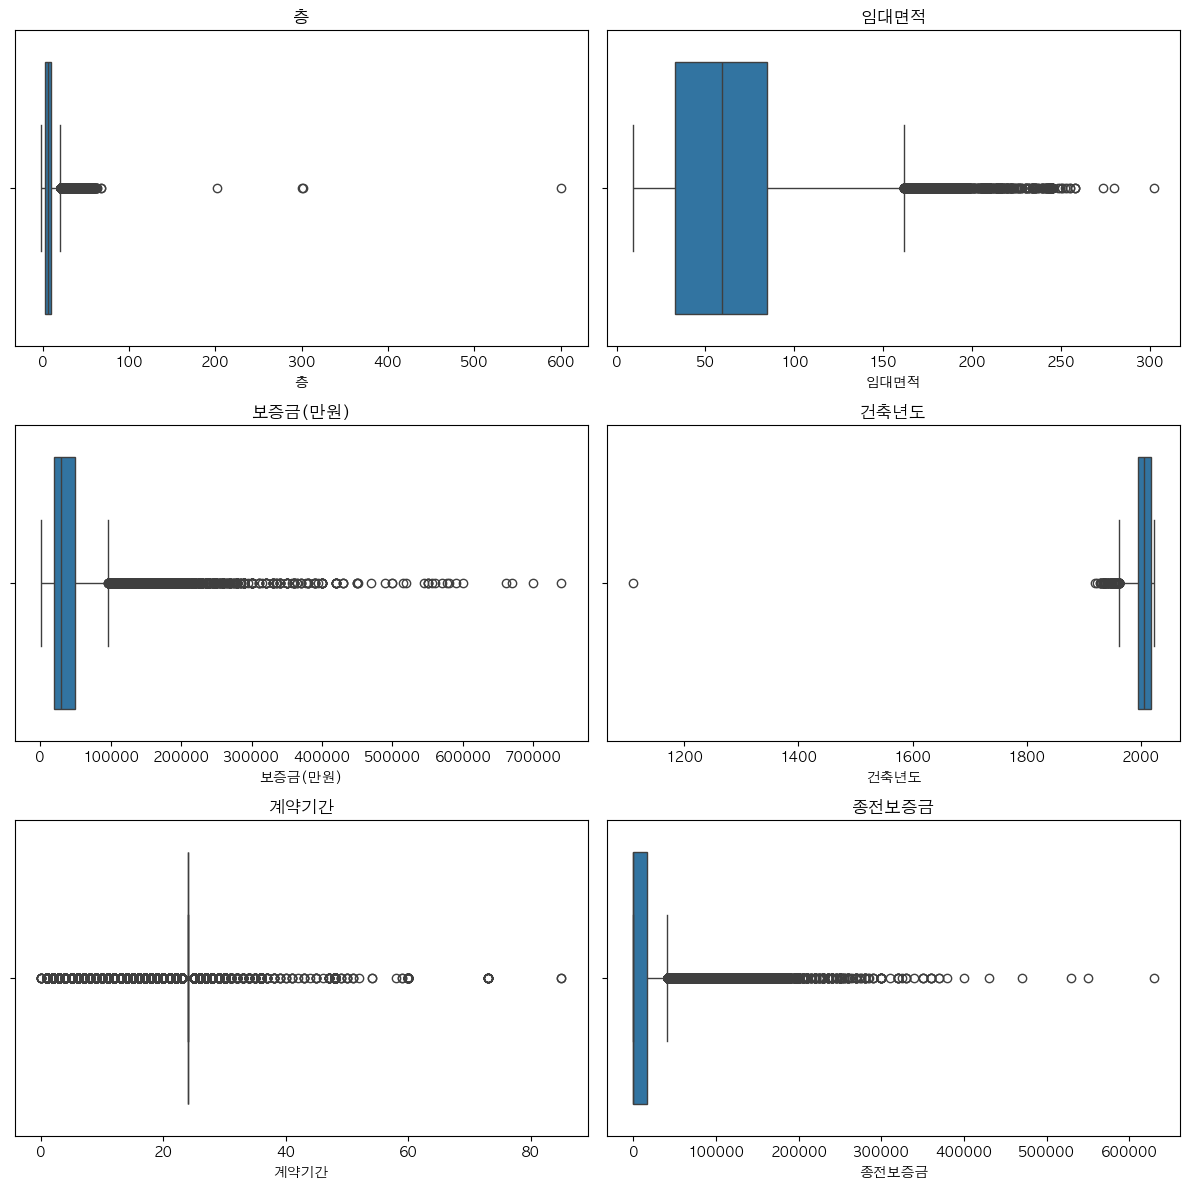

In [29]:
selected_columns = ['층', '임대면적', '보증금(만원)', '건축년도', '계약기간', '종전보증금']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(selected_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(selected_columns[i])
plt.tight_layout()
plt.show()

이상치가 있을 것으로 예상되는 수치형 데이터가 포함된 칼럼들을 박스플롯으로 나타냈다. 역시 확인해보니 층이 600개가 넘는 경우, 건축년도가 1200년 이전인 경우와 같이 상식을 벗어나는 이상치들이 보였다.

In [30]:
def replace_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        rev_range = 3
        df[column] = df[column].apply(lambda x: np.nan if x < (Q1 - rev_range * IQR) or x > (Q3 + rev_range * IQR) else x)

    return df

selected_columns = ['층', '임대면적', '건축년도', '계약기간']
df = replace_outliers(df, selected_columns)
df.dropna(inplace = True)
df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,2023-08-18,71.67,23900,1990.0,오피스텔,24.0,신규,0,0.0,2023-09-01,2025-09-01
4,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-11,14.40,9923,2011.0,오피스텔,24.0,신규,0,0.0,2023-02-01,2025-02-01
5,11530,구로구,10200,구로동,1.0,대지,5.0,2023-03-19,16.80,12000,2006.0,오피스텔,24.0,갱신,0,12000.0,2023-04-01,2025-04-01
6,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-30,14.88,10500,2011.0,오피스텔,24.0,신규,0,0.0,2023-03-01,2025-03-01
7,11260,중랑구,10400,묵동,1.0,대지,3.0,2023-05-15,84.71,46000,2003.0,아파트,24.0,신규,0,0.0,2023-07-01,2025-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262466,11290,성북구,13500,종암동,1.0,대지,6.0,2023-12-07,81.99,19000,1995.0,단독다가구,24.0,신규,0,0.0,2024-01-01,2026-01-01
262467,11380,은평구,10700,응암동,1.0,대지,6.0,2023-12-07,82.88,33000,2023.0,단독다가구,24.0,신규,0,0.0,2023-12-01,2025-12-01
262469,11140,중구,12900,남산동2가,1.0,대지,6.0,2023-12-07,104.85,38000,1997.0,단독다가구,24.0,신규,0,0.0,2024-01-01,2026-01-01
262470,11110,종로구,10100,청운동,1.0,대지,6.0,2023-12-07,123.36,60000,1991.0,단독다가구,24.0,신규,0,0.0,2023-12-01,2025-12-01


앞으로 데이터를 분석하고, 칼럼과 전세가 간 비교를 진행해야 하기 때문에 이상치는 버리기로 했다. 다만, '보증금(만원)'과 '종전보증금'은 가설에서 살펴보고자 하는 전세가 그 자체이기 때문에 따로 이상치 처리를 하지 않았다. 유독 높은 전세가를 가진 부동산에 대해서도 따로 분석을 하는 것이 본 연구의 취지와 맞다고 생각했기 때문이다.

# 2. 시각화
이제부터는 앞에서 말한 가설을 증명하기 전에 보증금과 다른 컬럼 간의 관계를 시각화를 통해 확인해 볼 것이다.

## 2-1. 지역(자치구)에 따른 전세가

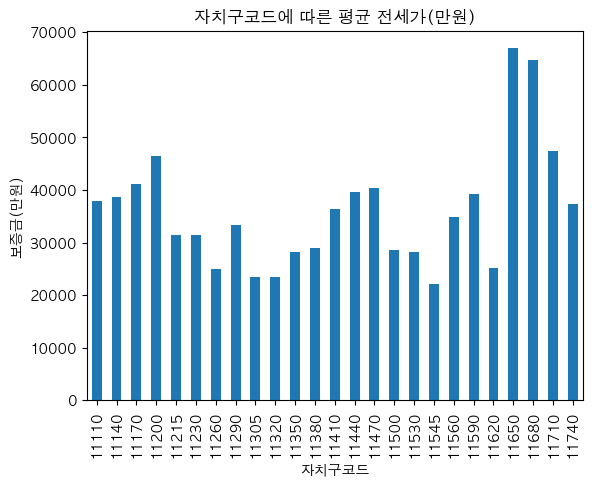

In [31]:
# 코드별로 보증금의 평균 계산
deposit_mean_by_code = df.groupby('자치구코드')['보증금(만원)'].mean()

# 시각화
deposit_mean_by_code.plot(kind='bar')
plt.xlabel('자치구코드')
plt.ylabel('보증금(만원)')
plt.title('자치구코드에 따른 평균 전세가(만원)')
plt.show()

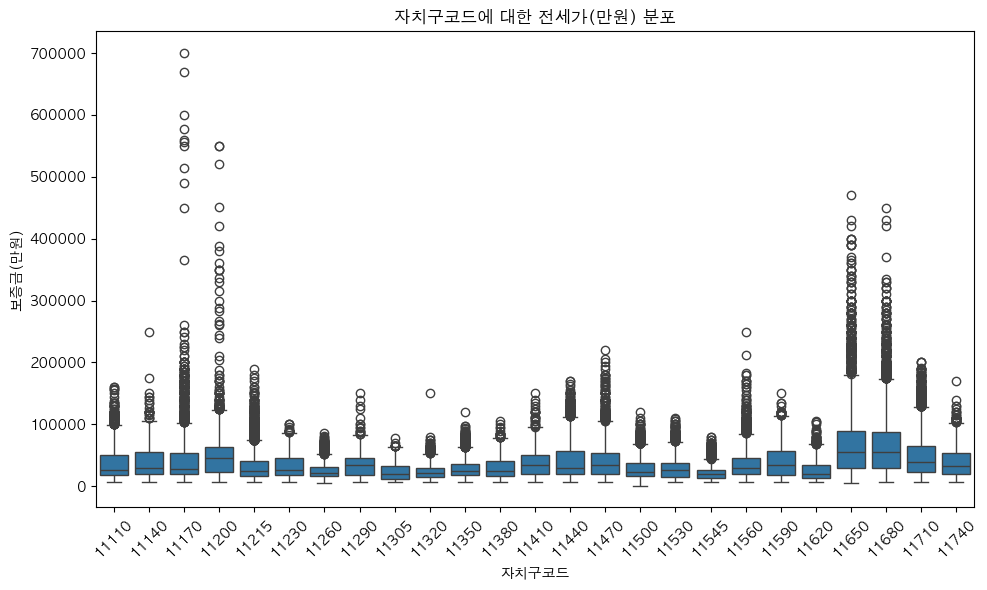

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='자치구코드', y='보증금(만원)', data=df)
plt.xlabel('자치구코드')
plt.ylabel('보증금(만원)')
plt.title('자치구코드에 대한 전세가(만원) 분포')
plt.xticks(rotation=45)  # 가로축 레이블 45도 회전
plt.tight_layout()  # 그래프의 요소들이 겹치지 않도록 조정
plt.show()

위 그래프를 분석해보았을때 11650(서초구),11680(강남구)가 평균적으로 높은 보증금을 가지는 것으로 확인됐다.\
추가로 위 박스 플럿과 히스토그램을 비교해보았을때 11170(용산구)는 평균적인 집값은 다른 지역들과 비슷하나 이상치의 개수가 다른 지역보다 특히 많아 히스토그램에서의 가격 평균 값이 높게 표시된 것으로 보인다.

다음은 집의 평수와 보증금의 관계를 알아보겠다.

## 2-2. 임대면적에 따른 전세가

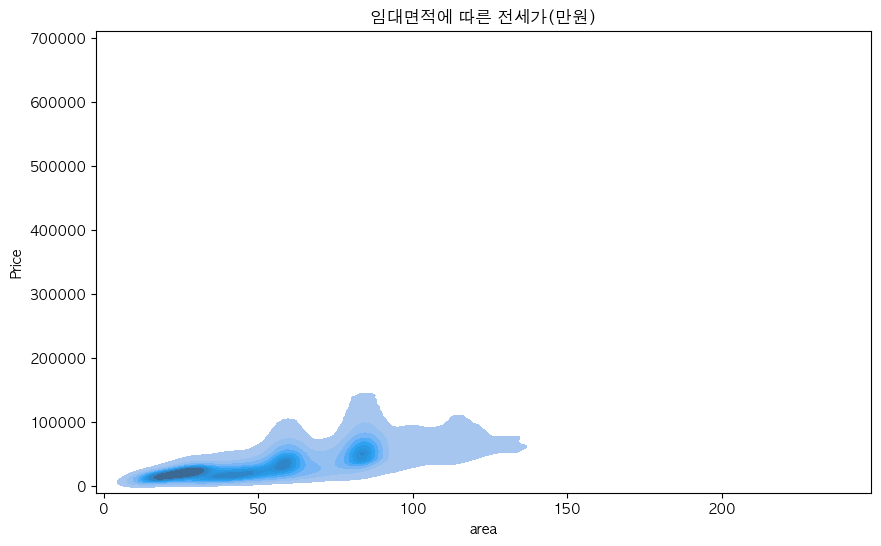

In [33]:
df['임대면적'] = df['임대면적'].astype(int)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='임대면적', y='보증금(만원)', fill=True)
plt.xlabel('area')
plt.ylabel('Price')
plt.title('임대면적에 따른 전세가(만원)')
plt.show()

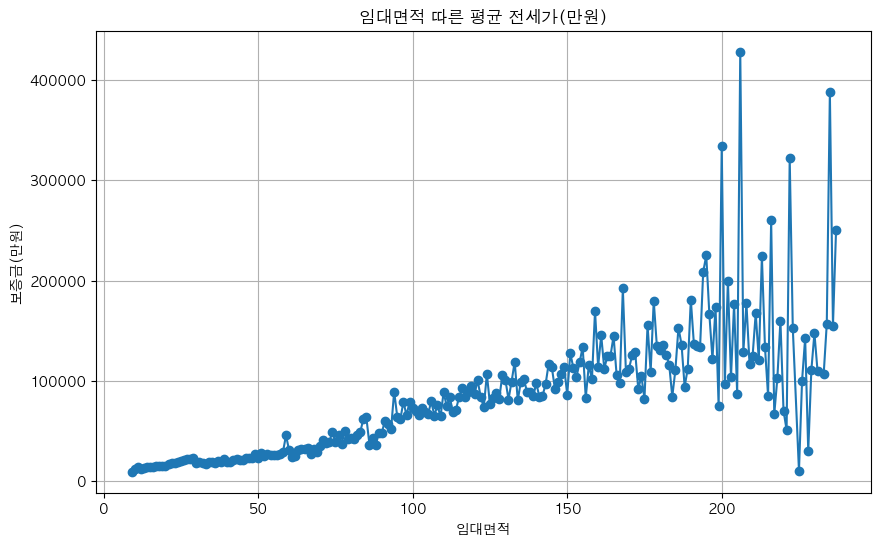

In [34]:
average_price_by_integer_area = df.groupby('임대면적')['보증금(만원)'].mean()
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_integer_area.index, average_price_by_integer_area.values, marker='o')
plt.xlabel('임대면적')
plt.ylabel('보증금(만원)')
plt.title('임대면적 따른 평균 전세가(만원)')
plt.grid(True)
plt.show()

## 2-3. 층에 따른 전세가

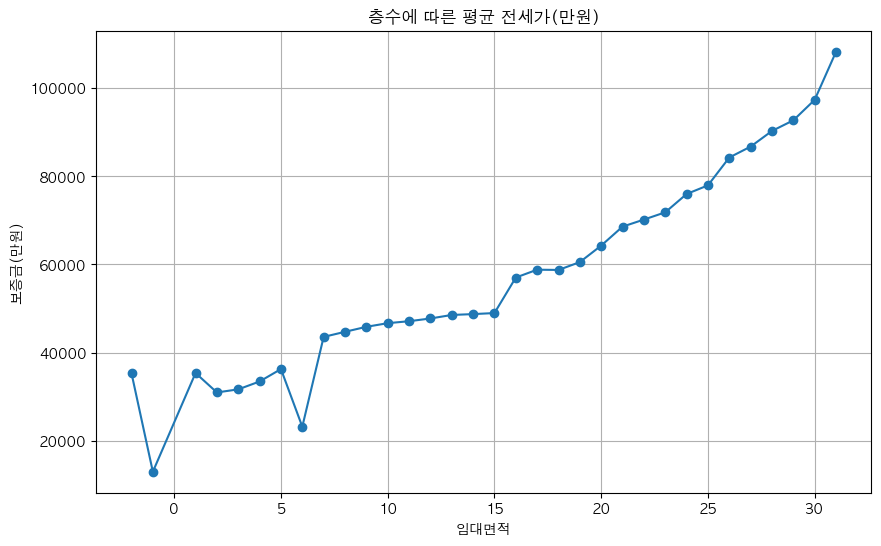

In [35]:
# 층수에 따른 가격의 평균 계산
average_price_by_floor = df.groupby('층')['보증금(만원)'].mean()

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_floor.index, average_price_by_floor.values, marker='o')
plt.xlabel('임대면적')
plt.ylabel('보증금(만원)')
plt.title('층수에 따른 평균 전세가(만원)')
plt.grid(True)
plt.show()

집의 층수와 보증금의 관게를 살펴보면 10층 전까지는 비례관계를 확인할 수 없으나 15층 이상의 집에 대해서는 층수와 집값간의 비례관계를 확인할 수 있다.

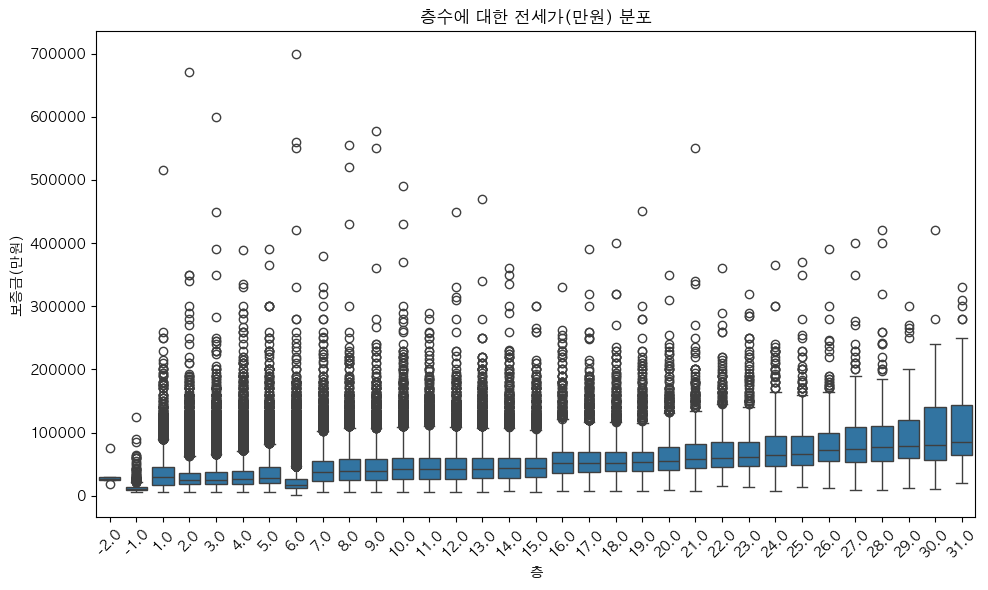

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='층', y='보증금(만원)', data=df)
plt.xlabel('층')
plt.ylabel('보증금(만원)')
plt.title('층수에 대한 전세가(만원) 분포')
plt.xticks(rotation=45)  # 가로축 레이블 45도 회전
plt.tight_layout()  # 그래프의 요소들이 겹치지 않도록 조정
plt.show()

## 2-4. 계약기간에 따른 전세가

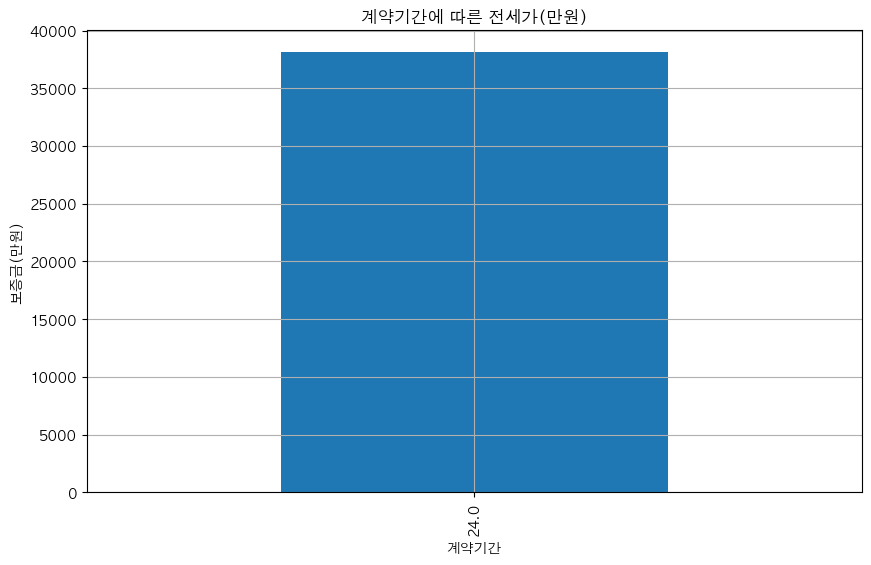

In [37]:
# 계약 기간에 따른 가격의 평균 계산
average_price_by_contract_period = df.groupby('계약기간')['보증금(만원)'].mean()

# 시각화
plt.figure(figsize=(10, 6))
average_price_by_contract_period.plot(kind='bar')
plt.xlabel('계약기간')
plt.ylabel('보증금(만원)')
plt.title('계약기간에 따른 전세가(만원)')
plt.grid(True)
plt.show()

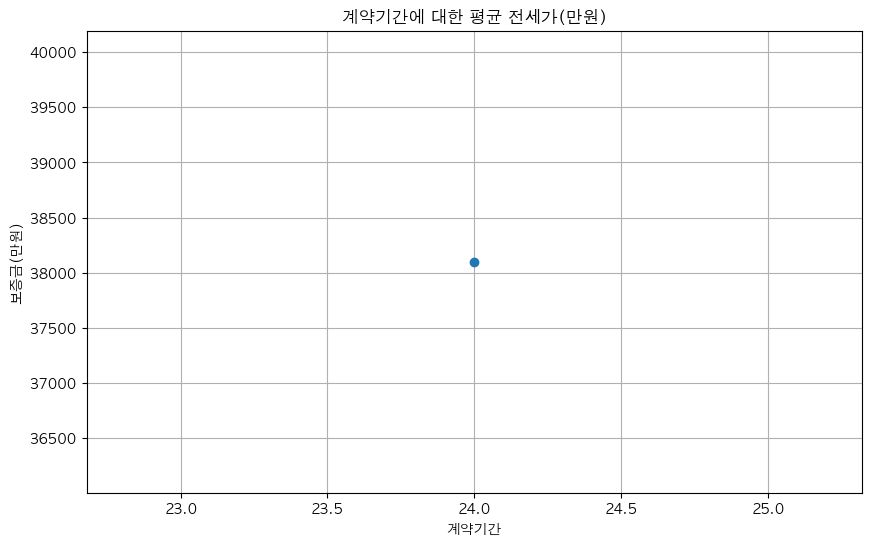

In [38]:
average_price_by_integer_area = df.groupby('계약기간')['보증금(만원)'].mean()
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_integer_area.index, average_price_by_integer_area.values, marker='o')
plt.xlabel('계약기간')
plt.ylabel('보증금(만원)')
plt.title('계약기간에 대한 평균 전세가(만원)')
plt.grid(True)
plt.show()

계약기간이 분포되어 있지 않아 비례관계를 확인하기 어렵다.

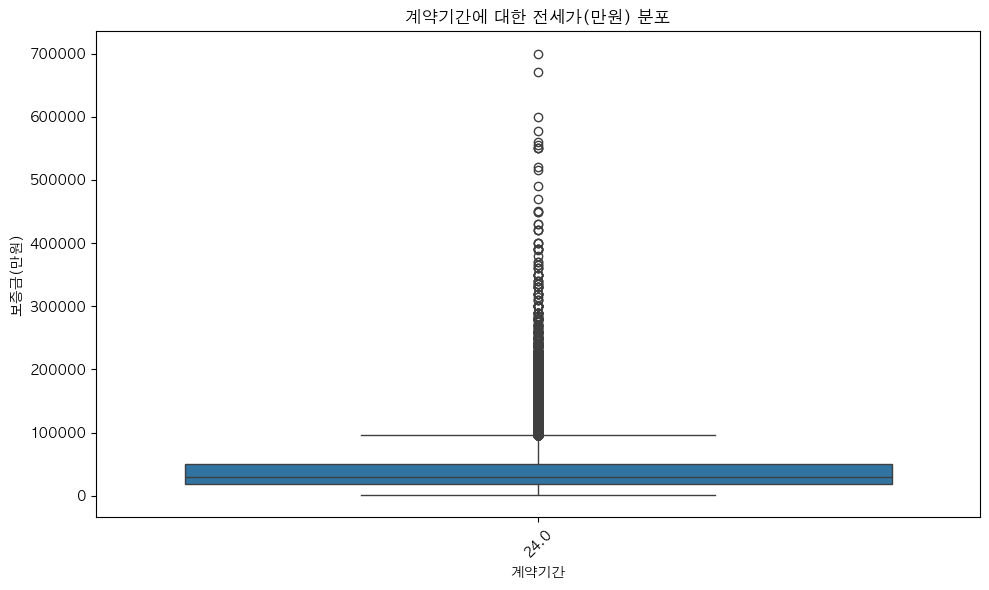

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='계약기간', y='보증금(만원)', data=df)
plt.xlabel('계약기간')
plt.ylabel('보증금(만원)')
plt.title('계약기간에 대한 전세가(만원) 분포')
plt.xticks(rotation=45)  # 가로축 레이블 45도 회전
plt.tight_layout()  # 그래프의 요소들이 겹치지 않도록 조정
plt.show()

## 2-5. 건물용도에 따른 전세가

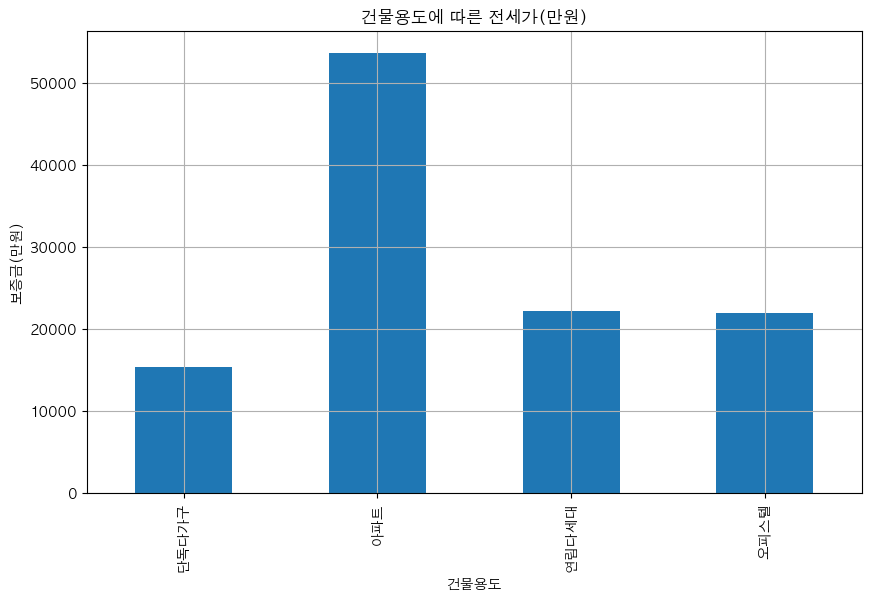

In [40]:
# 건물 유형에 따른 가격의 평균 계산
average_price_by_contract_period = df.groupby('건물용도')['보증금(만원)'].mean()

# 시각화
plt.figure(figsize=(10, 6))
average_price_by_contract_period.plot(kind='bar')
plt.xlabel('건물용도')
plt.ylabel('보증금(만원)')
plt.title('건물용도에 따른 전세가(만원)')
plt.grid(True)
plt.show()

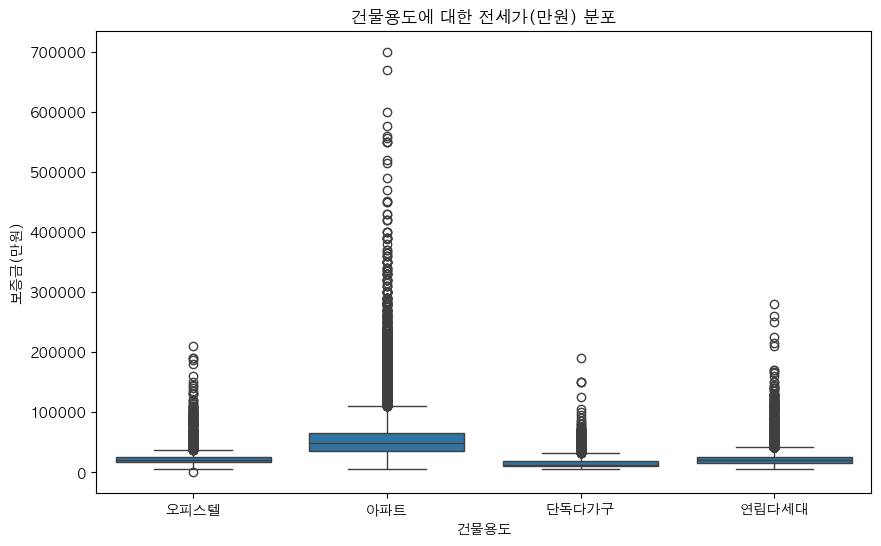

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='건물용도', y='보증금(만원)', data=df)
plt.xlabel('건물용도')
plt.ylabel('보증금(만원)')
plt.title('건물용도에 대한 전세가(만원) 분포')
plt.show()

위 박스플럿 그래프와 히스토그램을 보았을때 보증금 평균값의 차이는 크지않으나 아파트의 경우 이상치의 분포가 다른 집의 형태보다 확장되어 있어서 히스토그램에서의 평균값은 다른 형태의 집의 보증금과 많이 차이가 나는 것으로 보인다.

## 2-6. 계약유형에 따른 전세가
아래의 그래프을 보면 신규 계약의 집과 계약을 갱신하는 집의 보증금 평균값이 아주 미세하게 차이를 보이는 것을 확인할 수 있다.

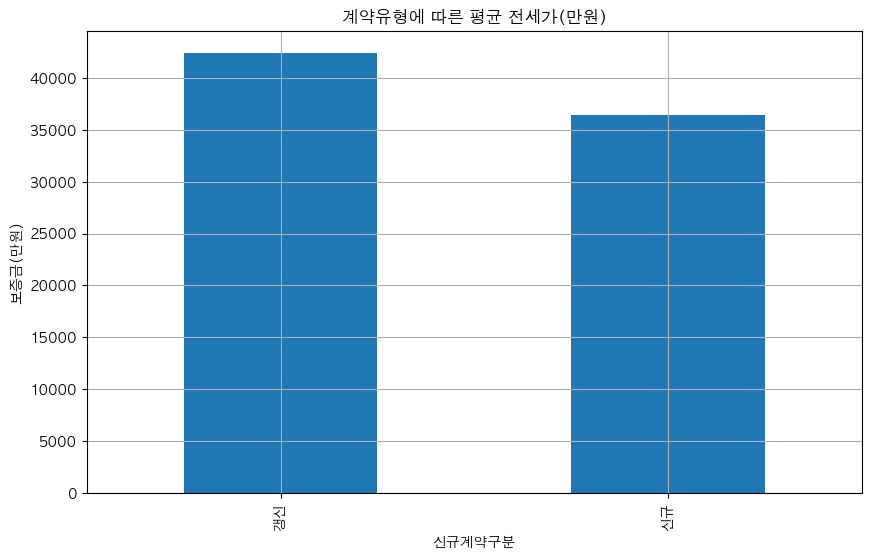

In [42]:
# 계약 유형에 따른 가격의 평균 계산
average_price_by_contract_type = df.groupby('신규계약구분')['보증금(만원)'].mean()

# 시각화
plt.figure(figsize=(10, 6))
average_price_by_contract_type .plot(kind='bar')
plt.xlabel('신규계약구분')
plt.ylabel('보증금(만원)')
plt.title('계약유형에 따른 평균 전세가(만원)')
plt.grid(True)
plt.show()

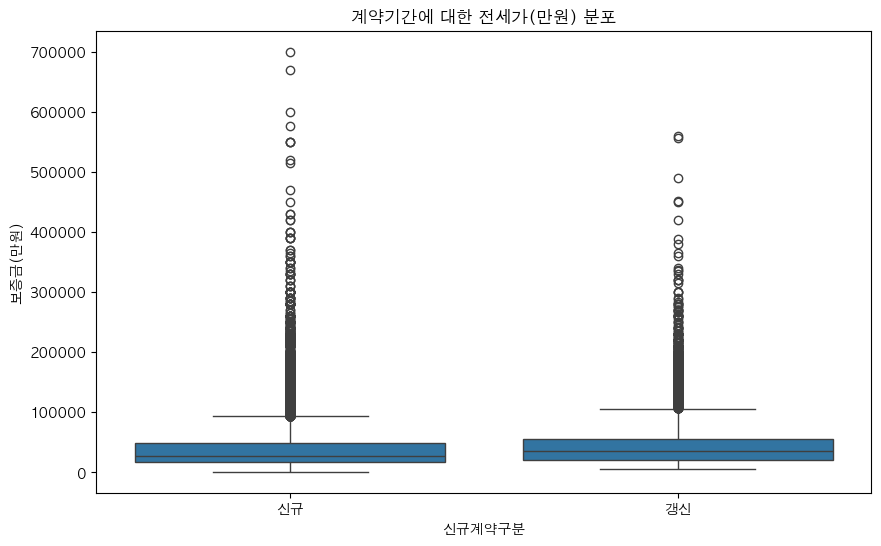

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='신규계약구분', y='보증금(만원)', data=df)
plt.xlabel('신규계약구분')
plt.ylabel('보증금(만원)')
plt.title('계약기간에 대한 전세가(만원) 분포')
plt.show()

## 2-7. 건축년도
마지막으로는 건축년도에 따른 집값의 분포를 확인해보겠다.
아래 그래프를 보면 대략 1970년대를 기준으로 가격의 평균값이 차이가 보여지지만 그 이상의 관계를 확인하기는 어려워보인다.
히스토그램에서는 건축년도과 가격이 양의 관계를 가지는 것 처럼 보이나, 박스플럿 그래프를 통해 이는 특정 이상치에 의한 것 임을 확인할 수 있다.

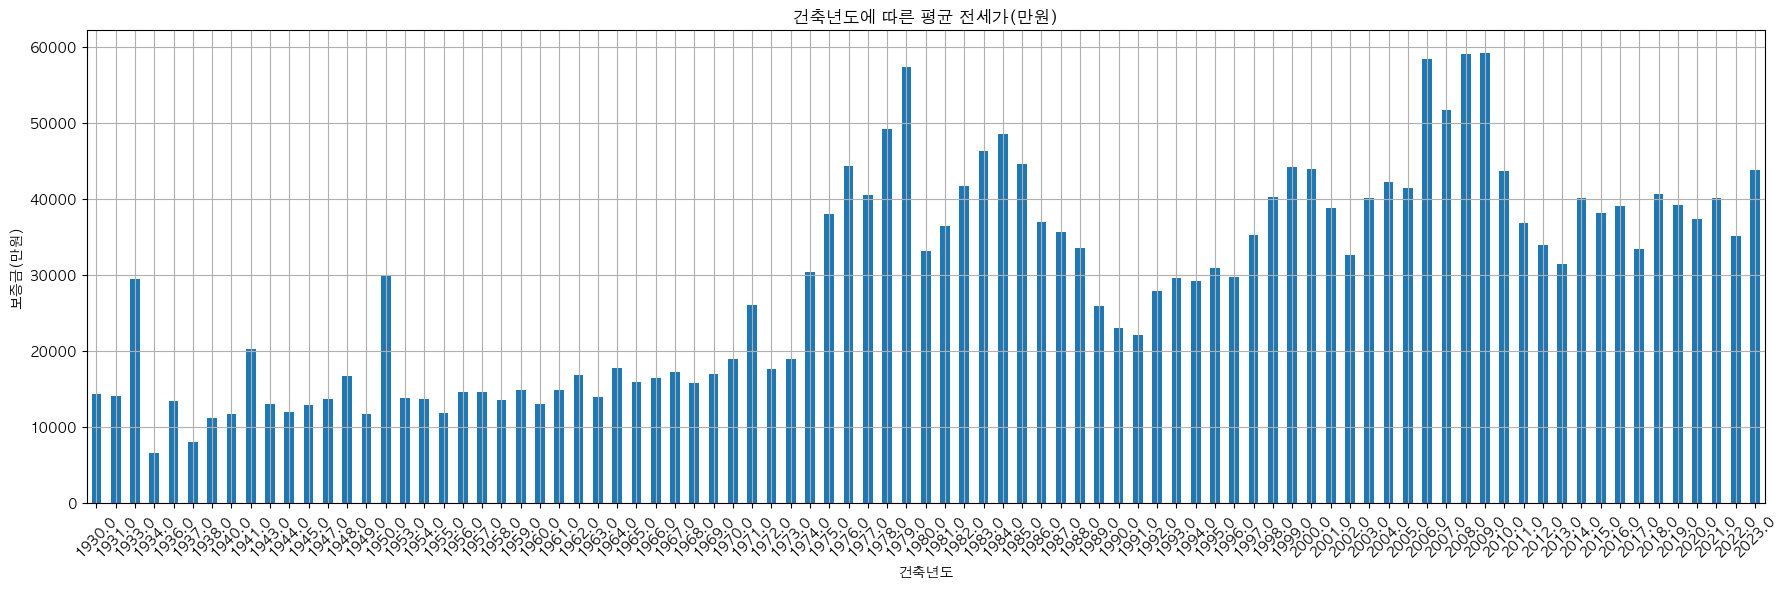

In [44]:
# 건축년도 에 따른 가격의 평균 계산
average_price_by_contract_period = df.groupby('건축년도')['보증금(만원)'].mean()

# 시각화
plt.figure(figsize=(18, 6))
average_price_by_contract_period.plot(kind='bar')
plt.xlabel('건축년도')
plt.ylabel('보증금(만원)')
plt.title('건축년도에 따른 평균 전세가(만원)')
plt.grid(True)
plt.xticks(rotation=45)  # 가로축 레이블 45도 회전
plt.tight_layout()  # 그래프의 요소들이 겹치지 않도록 조정
plt.show()

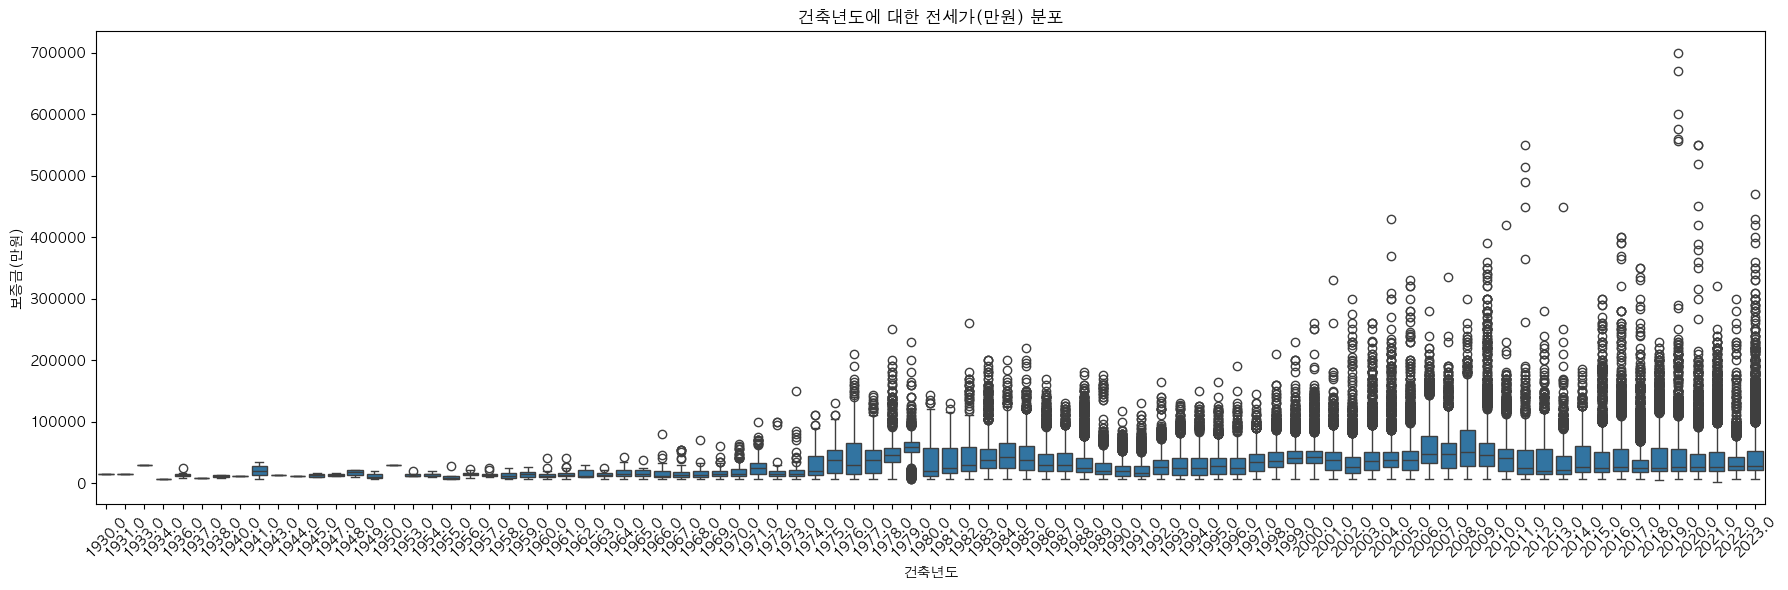

In [45]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='건축년도', y='보증금(만원)', data=df)
plt.xlabel('건축년도')
plt.ylabel('보증금(만원)')
plt.title('건축년도에 대한 전세가(만원) 분포')
plt.xticks(rotation=45)  # 가로축 레이블 45도 회전
plt.tight_layout()  # 그래프의 요소들이 겹치지 않도록 조정
plt.show()

# 3. 심층분석

## 3-1. 시계열분석: 계약일에 따른 전세가

In [46]:
from datetime import date

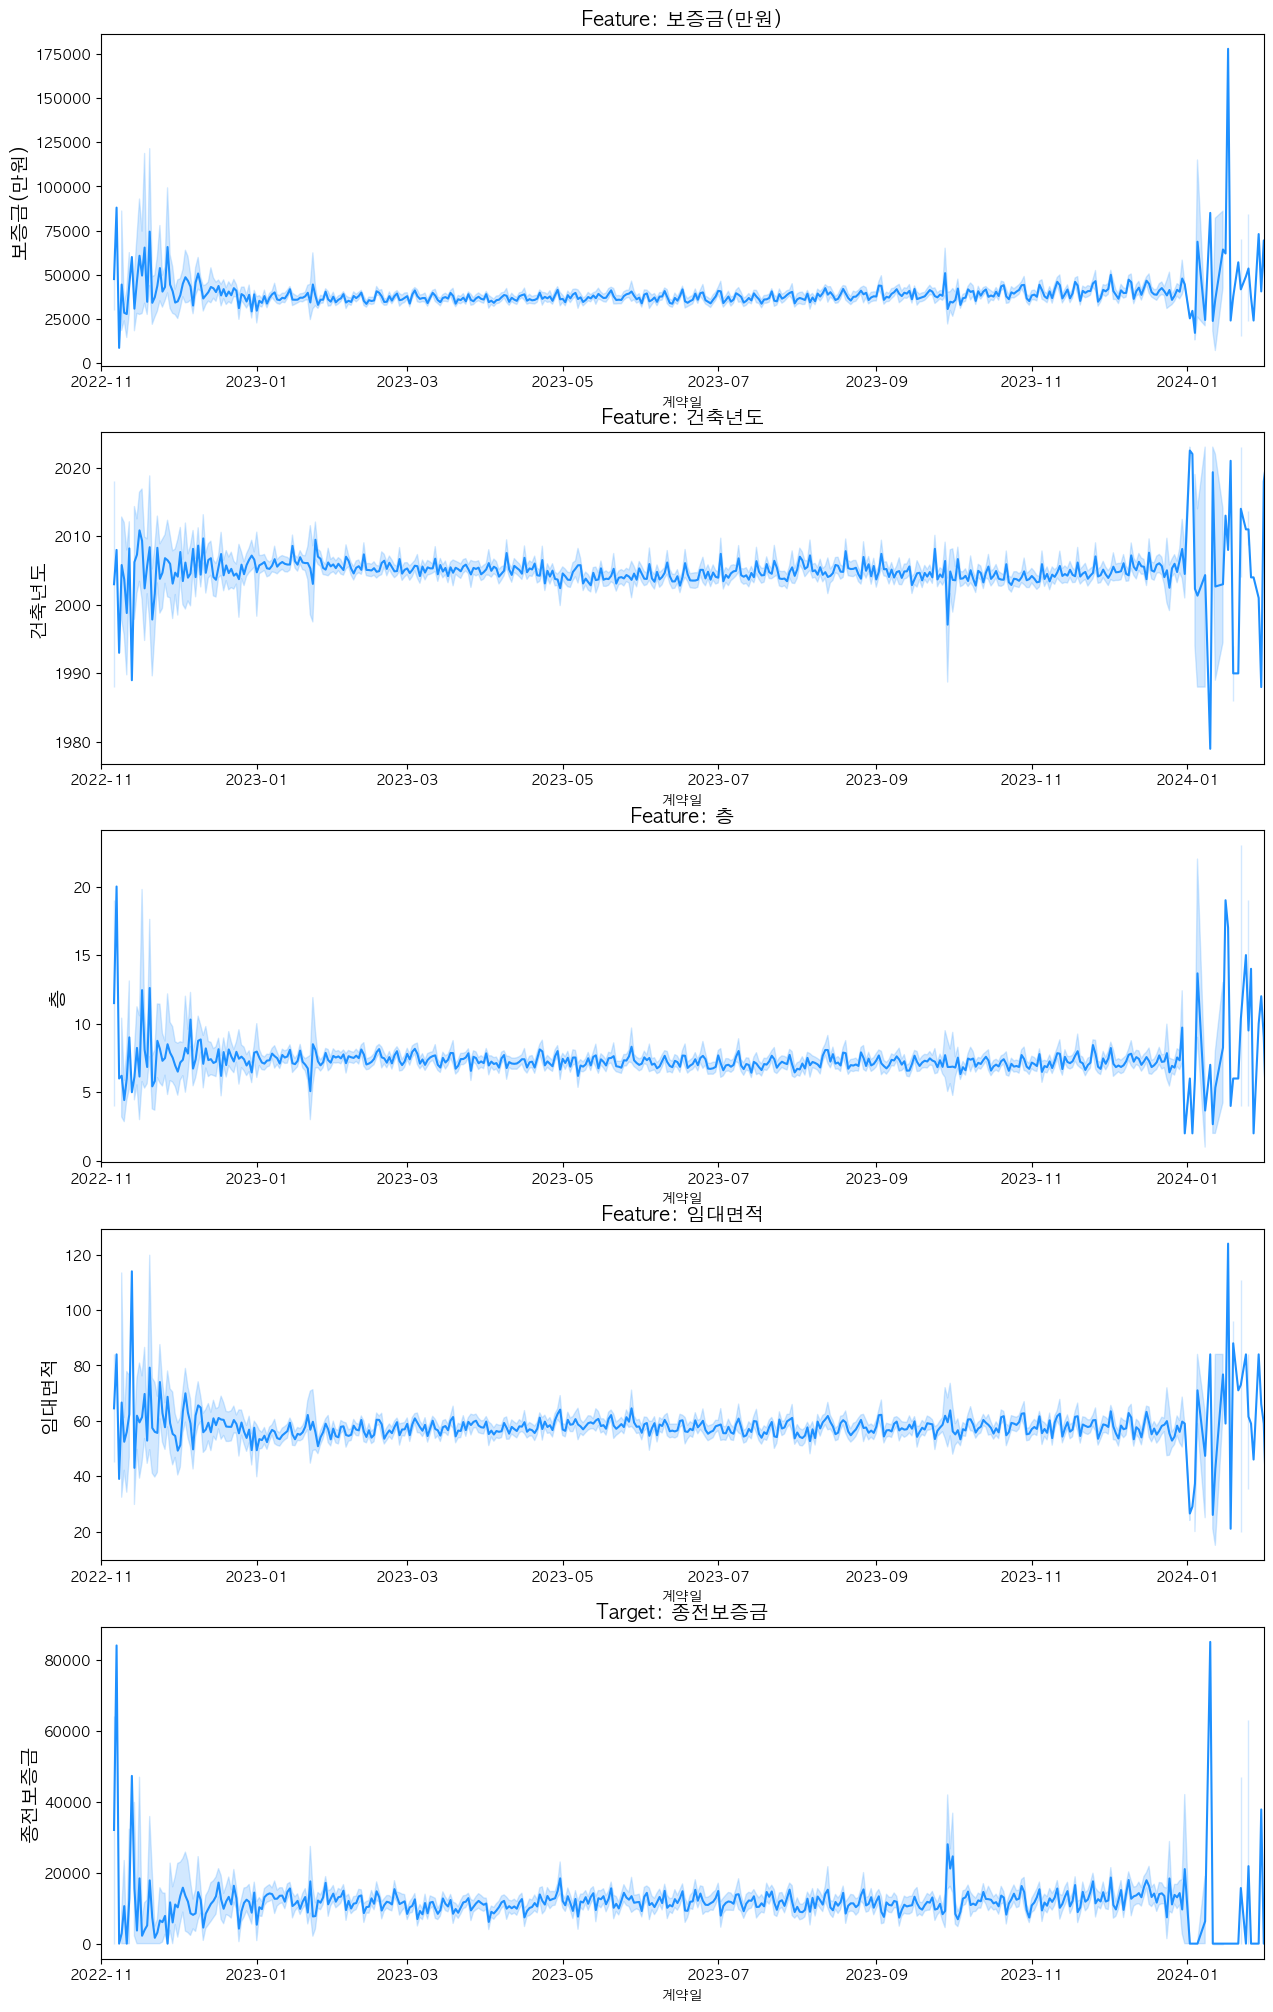

In [47]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

sns.lineplot(x=df.계약일, y=df['보증금(만원)'].fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: 보증금(만원)', fontsize=14)
ax[0].set_ylabel(ylabel='보증금(만원)', fontsize=14)


sns.lineplot(x=df.계약일, y=df['건축년도'].fillna(np.inf), ax=ax[1], color='dodgerblue')
ax[1].set_title('Feature: 건축년도', fontsize=14)
ax[1].set_ylabel(ylabel='건축년도', fontsize=14)


sns.lineplot(x=df.계약일, y=df['층'].fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: 층', fontsize=14)
ax[2].set_ylabel(ylabel='층', fontsize=14)


sns.lineplot(x=df.계약일, y=df['임대면적'].fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: 임대면적', fontsize=14)
ax[3].set_ylabel(ylabel='임대면적', fontsize=14)


sns.lineplot(x=df.계약일, y=df['종전보증금'].fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: 종전보증금', fontsize=14)
ax[4].set_ylabel(ylabel='종전보증금', fontsize=14)


for i in range(5):
    ax[i].set_xlim([date(2022, 11, 1), date(2024, 1 , 31)])

plt.show()

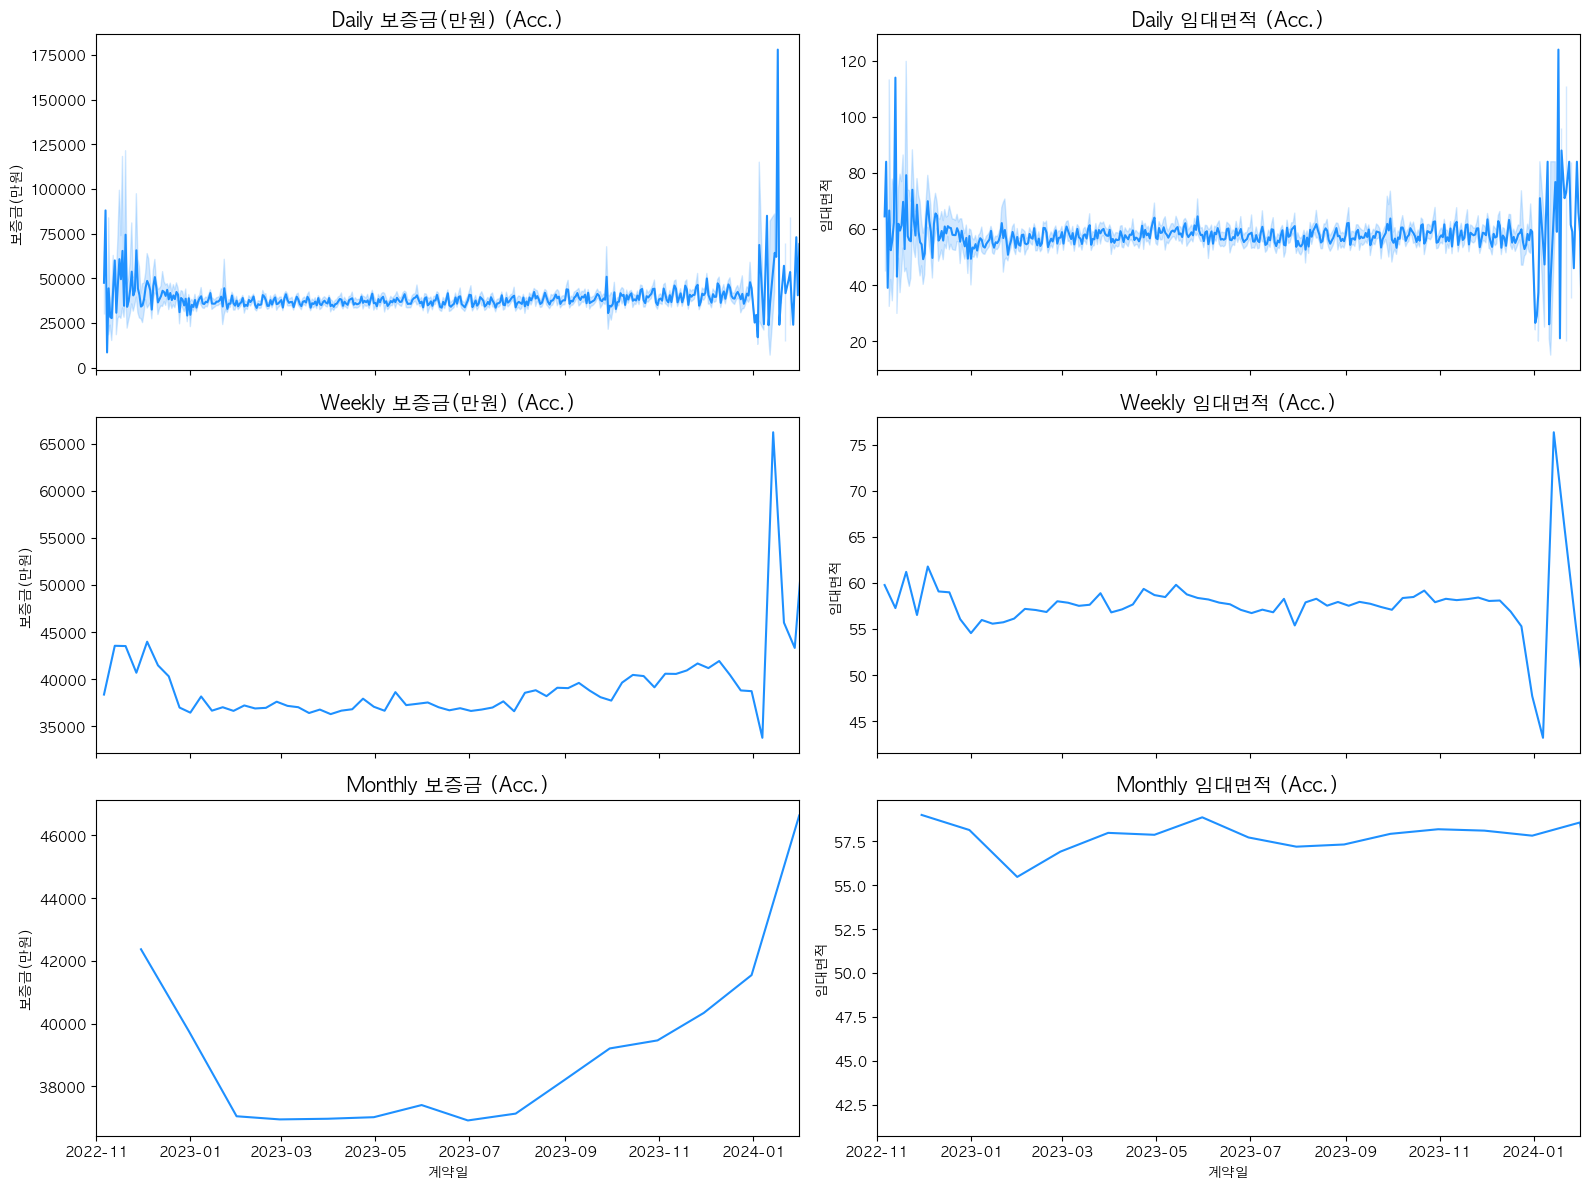

In [48]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16, 12))

# Daily 보증금(만원)
sns.lineplot(x=df['계약일'], y=df['보증금(만원)'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Daily 보증금(만원) (Acc.)', fontsize=14)
ax[0, 0].set_xlim([date(2022, 11, 1), date(2024, 1, 31)])

# Weekly 보증금(만원)
resampled_df_weekly = df[['계약일', '보증금(만원)']].resample('7D', on='계약일').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df_weekly['계약일'], y=resampled_df_weekly['보증금(만원)'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly 보증금(만원) (Acc.)', fontsize=14)
ax[1, 0].set_xlim([date(2022, 11, 1), date(2024, 1, 31)])

# Monthly 보증금(만원)
resampled_df_monthly = df[['계약일', '보증금(만원)']].resample('M', on='계약일').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df_monthly['계약일'], y=resampled_df_monthly['보증금(만원)'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly 보증금 (Acc.)', fontsize=14)
ax[2, 0].set_xlim([date(2022, 11, 1), date(2024, 1, 31)])

# Daily 임대면적
sns.lineplot(x=df['계약일'], y=df['임대면적'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily 임대면적 (Acc.)', fontsize=14)
ax[0, 1].set_xlim([date(2022, 11, 1), date(2024, 1, 31)])

# Weekly 임대면적
resampled_df_weekly = df[['계약일', '임대면적']].resample('7D', on='계약일').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df_weekly['계약일'], y=resampled_df_weekly['임대면적'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly 임대면적 (Acc.)', fontsize=14)
ax[1, 1].set_xlim([date(2022, 11, 1), date(2024, 1, 31)])

# Monthly 임대면적
resampled_df_monthly = df[['계약일', '임대면적']].resample('M', on='계약일').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df_monthly['계약일'], y=resampled_df_monthly['임대면적'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly 임대면적 (Acc.)', fontsize=14)
ax[2, 1].set_xlim([date(2022, 11, 1), date(2024, 1, 31)])

plt.tight_layout()
plt.show()

## 3-2. 상관계수 분석: 칼럼 간 관계

In [61]:
df.describe()

,보증금(만원),층,임대면적,건축년도,계약기간,갱신청구권사용,종전보증금
count,197490.000000,197490.000000,197490.000000,197490.000000,197490.0,197490.000000,197490.000000
mean,38099.276034,7.285149,57.645769,2004.733394,24.0,0.096724,12099.622715
std,29033.372513,5.363789,29.255554,12.684102,0.0,0.295582,26203.064530
min,1000.000000,-2.000000,9.000000,1930.000000,24.0,0.000000,0.000000
25%,18900.000000,3.000000,33.000000,1995.000000,24.0,0.000000,0.000000
50%,29400.000000,6.000000,58.000000,2005.000000,24.0,0.000000,0.000000
75%,50000.000000,10.000000,84.000000,2017.000000,24.0,0.000000,13000.000000
max,700000.000000,31.000000,237.000000,2023.000000,24.0,1.000000,530000.000000


### 3-2-1. 원-핫 인코딩

In [50]:
df

,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,층,계약일,임대면적,보증금(만원),건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,계약시작연월,계약종료연월
1,11170,용산구,11300,원효로2가,1.0,대지,9.0,2023-08-18,71,23900,1990.0,오피스텔,24.0,신규,0,0.0,2023-09-01,2025-09-01
4,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-11,14,9923,2011.0,오피스텔,24.0,신규,0,0.0,2023-02-01,2025-02-01
5,11530,구로구,10200,구로동,1.0,대지,5.0,2023-03-19,16,12000,2006.0,오피스텔,24.0,갱신,0,12000.0,2023-04-01,2025-04-01
6,11560,영등포구,11700,당산동,1.0,대지,6.0,2023-01-30,14,10500,2011.0,오피스텔,24.0,신규,0,0.0,2023-03-01,2025-03-01
7,11260,중랑구,10400,묵동,1.0,대지,3.0,2023-05-15,84,46000,2003.0,아파트,24.0,신규,0,0.0,2023-07-01,2025-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262466,11290,성북구,13500,종암동,1.0,대지,6.0,2023-12-07,81,19000,1995.0,단독다가구,24.0,신규,0,0.0,2024-01-01,2026-01-01
262467,11380,은평구,10700,응암동,1.0,대지,6.0,2023-12-07,82,33000,2023.0,단독다가구,24.0,신규,0,0.0,2023-12-01,2025-12-01
262469,11140,중구,12900,남산동2가,1.0,대지,6.0,2023-12-07,104,38000,1997.0,단독다가구,24.0,신규,0,0.0,2024-01-01,2026-01-01
262470,11110,종로구,10100,청운동,1.0,대지,6.0,2023-12-07,123,60000,1991.0,단독다가구,24.0,신규,0,0.0,2023-12-01,2025-12-01


In [51]:
# 열의 데이터 타입 확인
print(df[['층', '자치구코드', '법정동코드', '건축년도', '건물용도', '신규계약구분']].dtypes)

층         float64
자치구코드       int64
법정동코드       int64
건축년도      float64
건물용도       object
신규계약구분     object
dtype: object


In [52]:
df = df.drop(df.columns[[0,2,3,4,7,16,17]], axis = 1) # 자치구코드, 법정동코드, 법정동명, 지번구분코드, 지번구분, 계약일, 계약시작연월, 계약종료연월
df = pd.get_dummies(df)
df = df[['보증금(만원)'] + [col for col in df.columns if col != '보증금(만원)']]
df

,보증금(만원),층,임대면적,건축년도,계약기간,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강동구,자치구명_강북구,...,자치구명_중랑구,지번구분_대지,지번구분_블럭,지번구분_산,건물용도_단독다가구,건물용도_아파트,건물용도_연립다세대,건물용도_오피스텔,신규계약구분_갱신,신규계약구분_신규
1,23900,9.0,71,1990.0,24.0,0,0.0,False,False,False,...,False,True,False,False,False,False,False,True,False,True
4,9923,6.0,14,2011.0,24.0,0,0.0,False,False,False,...,False,True,False,False,False,False,False,True,False,True
5,12000,5.0,16,2006.0,24.0,0,12000.0,False,False,False,...,False,True,False,False,False,False,False,True,True,False
6,10500,6.0,14,2011.0,24.0,0,0.0,False,False,False,...,False,True,False,False,False,False,False,True,False,True
7,46000,3.0,84,2003.0,24.0,0,0.0,False,False,False,...,True,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262466,19000,6.0,81,1995.0,24.0,0,0.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
262467,33000,6.0,82,2023.0,24.0,0,0.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
262469,38000,6.0,104,1997.0,24.0,0,0.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
262470,60000,6.0,123,1991.0,24.0,0,0.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [53]:
# 상관관계 계산
correlation_matrix = df.corr()

# 결과를 데이터프레임으로 변환
correlation_df = pd.DataFrame(correlation_matrix)

# 상관관계 행렬 출력
correlation_df

,보증금(만원),층,임대면적,건축년도,계약기간,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강동구,자치구명_강북구,...,자치구명_중랑구,지번구분_대지,지번구분_블럭,지번구분_산,건물용도_단독다가구,건물용도_아파트,건물용도_연립다세대,건물용도_오피스텔,신규계약구분_갱신,신규계약구분_신규
보증금(만원),1.000000,0.363431,0.712078,0.072557,NaN,0.077319,0.420855,0.246167,-0.006544,-0.067809,...,-0.083228,0.008408,-0.003540,-0.007702,-0.295396,0.572068,-0.313516,-0.179047,0.091491,-0.091491
층,0.363431,1.000000,0.237505,0.074214,NaN,0.029425,0.150104,0.011149,0.025790,-0.025664,...,-0.027330,0.001974,0.000996,-0.002950,-0.090345,0.402209,-0.431742,0.053393,0.030443,-0.030443
임대면적,0.712078,0.237505,1.000000,-0.297090,NaN,0.071525,0.334388,0.093253,-0.000300,-0.005108,...,-0.055058,-0.001709,-0.004433,0.004786,-0.202583,0.607962,-0.331908,-0.317580,0.125393,-0.125393
건축년도,0.072557,0.074214,-0.297090,1.000000,NaN,-0.025486,-0.034863,-0.071807,0.061534,-0.025060,...,0.033867,0.000569,0.012762,-0.008649,-0.186563,-0.227027,0.216677,0.277250,-0.079941,0.079941
계약기간,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
갱신청구권사용,0.077319,0.029425,0.071525,-0.025486,NaN,1.000000,0.467007,0.003972,0.010006,-0.006923,...,-0.000623,0.002913,-0.000637,-0.003036,-0.055724,0.086477,-0.025368,-0.047060,0.529126,-0.529126
종전보증금,0.420855,0.150104,0.334388,-0.034863,NaN,0.467007,1.000000,0.101720,0.010376,-0.027343,...,-0.037267,0.002534,-0.002986,-0.001121,-0.128038,0.267948,-0.140854,-0.104321,0.747093,-0.747093
자치구명_강남구,0.246167,0.011149,0.093253,-0.071807,NaN,0.003972,0.101720,1.000000,-0.063213,-0.035955,...,-0.049346,0.004763,-0.001234,-0.004845,-0.035268,0.079630,-0.056624,-0.012377,0.007530,-0.007530
자치구명_강동구,-0.006544,0.025790,-0.000300,0.061534,NaN,0.010006,0.010376,-0.063213,1.000000,-0.031388,...,-0.043077,-0.006800,-0.002643,0.009671,-0.009002,0.013572,0.008334,-0.025247,0.027722,-0.027722
자치구명_강북구,-0.067809,-0.025664,-0.005108,-0.025060,NaN,-0.006923,-0.027343,-0.035955,-0.031388,1.000000,...,-0.024502,0.002837,-0.001503,-0.002406,0.042272,-0.031551,0.026888,-0.033533,-0.007205,0.007205


## 3-2-2. 히트맵

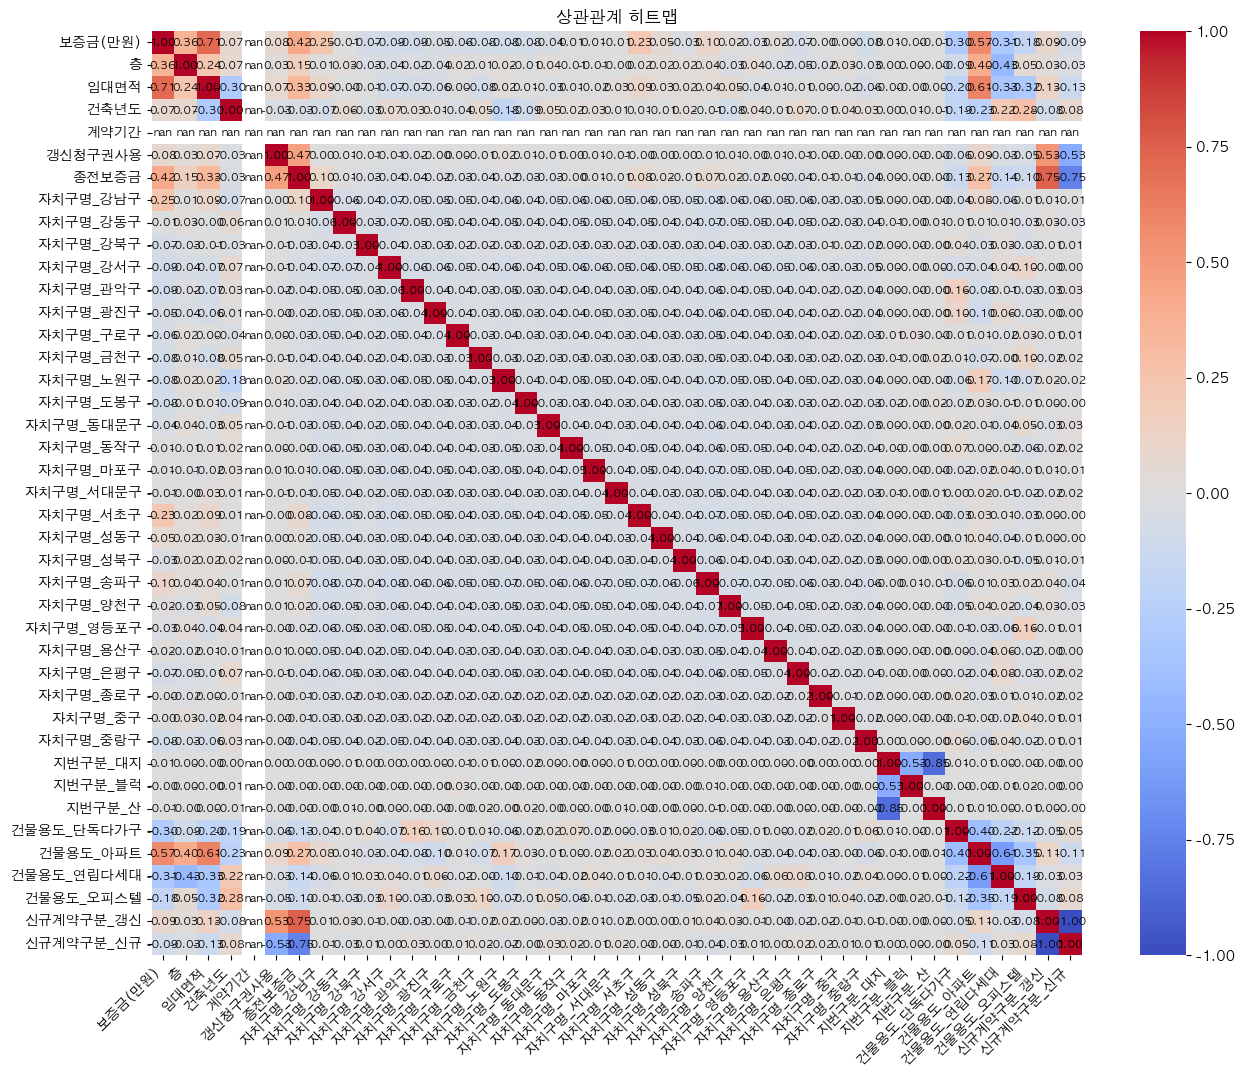

In [54]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(correlation_df, cmap='coolwarm', annot=False)  # Disable automatic annotations

# Manually add annotations
for i in range(len(correlation_df)):
    for j in range(len(correlation_df)):
        text = f"{correlation_df.iloc[i, j]:.2f}"  # Format the text
        heatmap.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=8)

# Adjust tick labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=10)

plt.title('상관관계 히트맵')
plt.show()

## 3-2-3. 선형회귀

가설검증을 위해서 다중 선형 회귀 분석을 사용하는 것이 적절하다고 판단 <br>
독립 변수: 위치(자치구명), 층수, 면적, 건축년도, 건물 유형, 신규 계약 <br>
종속 변수: 주택 가격(보증금(만원))

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df.iloc[:,0]
x = df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,보증금(만원),층,임대면적,건축년도,계약기간,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강동구,자치구명_강북구,...,자치구명_중랑구,지번구분_대지,지번구분_블럭,지번구분_산,건물용도_단독다가구,건물용도_아파트,건물용도_연립다세대,건물용도_오피스텔,신규계약구분_갱신,신규계약구분_신규
0,-0.489069,0.319710,0.456469,-1.161567,0.0,-0.327233,-0.461765,-0.269094,-0.234909,-0.133616,...,-0.183377,0.021233,-0.011252,-0.018005,-0.377069,-1.066970,-0.574626,3.087887,-0.618082,0.618082
1,-0.970481,-0.239598,-1.491884,0.494053,0.0,-0.327233,-0.461765,-0.269094,-0.234909,-0.133616,...,-0.183377,0.021233,-0.011252,-0.018005,-0.377069,-1.066970,-0.574626,3.087887,-0.618082,0.618082
2,-0.898943,-0.426034,-1.423520,0.099858,0.0,-0.327233,-0.003802,-0.269094,-0.234909,-0.133616,...,-0.183377,0.021233,-0.011252,-0.018005,-0.377069,-1.066970,-0.574626,3.087887,1.617909,-1.617909
3,-0.950608,-0.239598,-1.491884,0.494053,0.0,-0.327233,-0.461765,-0.269094,-0.234909,-0.133616,...,-0.183377,0.021233,-0.011252,-0.018005,-0.377069,-1.066970,-0.574626,3.087887,-0.618082,0.618082
4,0.272126,-0.798905,0.900831,-0.136659,0.0,-0.327233,-0.461765,-0.269094,-0.234909,-0.133616,...,5.453232,0.021233,-0.011252,-0.018005,-0.377069,0.937233,-0.574626,-0.323846,-0.618082,0.618082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197485,-0.657840,-0.239598,0.798286,-0.767372,0.0,-0.327233,-0.461765,-0.269094,-0.234909,-0.133616,...,-0.183377,0.021233,-0.011252,-0.018005,2.652032,-1.066970,-0.574626,-0.323846,-0.618082,0.618082
197486,-0.175635,-0.239598,0.832467,1.440122,0.0,-0.327233,-0.461765,-0.269094,-0.234909,-0.133616,...,-0.183377,0.021233,-0.011252,-0.018005,2.652032,-1.066970,-0.574626,-0.323846,-0.618082,0.618082
197487,-0.003419,-0.239598,1.584463,-0.609693,0.0,-0.327233,-0.461765,-0.269094,-0.234909,-0.133616,...,-0.183377,0.021233,-0.011252,-0.018005,2.652032,-1.066970,-0.574626,-0.323846,-0.618082,0.618082
197488,0.754331,-0.239598,2.233914,-1.082728,0.0,-0.327233,-0.461765,-0.269094,-0.234909,-0.133616,...,-0.183377,0.021233,-0.011252,-0.018005,2.652032,-1.066970,-0.574626,-0.323846,-0.618082,0.618082


In [58]:
import statsmodels.api as sm
y_scaled = df_scaled.iloc[:,0]
x_scaled = df_scaled.iloc[:,1:]

reg = sm.OLS(y_scaled,x_scaled).fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                보증금(만원)   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                          1.787e+04
Date:                Sun, 25 Feb 2024   Prob (F-statistic):                        0.00
Time:                        20:00:28   Log-Likelihood:                     -1.3510e+05
No. Observations:              197490   AIC:                                  2.703e+05
Df Residuals:                  197453   BIC:                                  2.706e+05
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

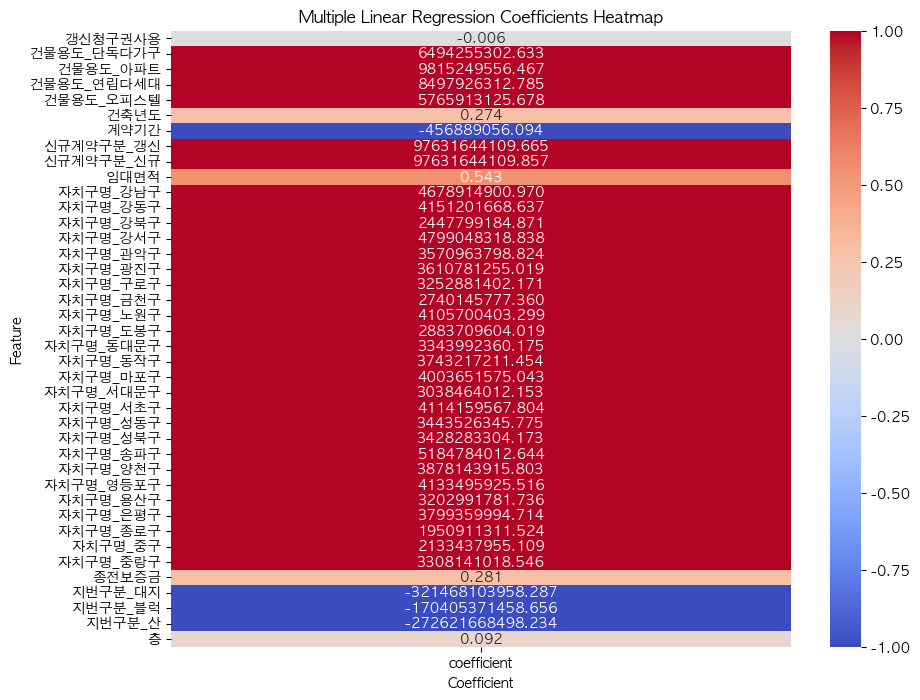

In [59]:
coefficients = reg.params
coefficients_df = pd.DataFrame({'feature': coefficients.index, 'coefficient': coefficients.values})
heatmap_data = coefficients_df.pivot_table(index='feature', columns=None, values='coefficient')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f", vmin=-1, vmax=1)
plt.title('Multiple Linear Regression Coefficients Heatmap')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [60]:
df

,보증금(만원),층,임대면적,건축년도,계약기간,갱신청구권사용,종전보증금,자치구명_강남구,자치구명_강동구,자치구명_강북구,...,자치구명_중랑구,지번구분_대지,지번구분_블럭,지번구분_산,건물용도_단독다가구,건물용도_아파트,건물용도_연립다세대,건물용도_오피스텔,신규계약구분_갱신,신규계약구분_신규
1,23900,9.0,71,1990.0,24.0,0,0.0,False,False,False,...,False,True,False,False,False,False,False,True,False,True
4,9923,6.0,14,2011.0,24.0,0,0.0,False,False,False,...,False,True,False,False,False,False,False,True,False,True
5,12000,5.0,16,2006.0,24.0,0,12000.0,False,False,False,...,False,True,False,False,False,False,False,True,True,False
6,10500,6.0,14,2011.0,24.0,0,0.0,False,False,False,...,False,True,False,False,False,False,False,True,False,True
7,46000,3.0,84,2003.0,24.0,0,0.0,False,False,False,...,True,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262466,19000,6.0,81,1995.0,24.0,0,0.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
262467,33000,6.0,82,2023.0,24.0,0,0.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
262469,38000,6.0,104,1997.0,24.0,0,0.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
262470,60000,6.0,123,1991.0,24.0,0,0.0,False,False,False,...,False,True,False,False,True,False,False,False,False,True
